2017 Edition

# Anomaly Detection in Network Traffic with K-means clustering

We can categorize machine learning algorithms into two main groups: **supervised learning** and **unsupervised learning**. With supervised learning algorithms, in order to predict unknown values for new data, we have to know the target value for many previously-seen examples. In contrast, unsupervised learning algorithms explore the data which has no target attribute to find some intrinsic structures in them.

Clustering is a technique for finding similar groups in data, called **clusters**. Clustering is often called an unsupervised learning task as no class values denoting an a priori grouping of the data instances are given.

In this notebook, we will use K-means, a very well-known clustering algorithm to detect anomaly network connections based on statistics about each of them. A thorough overview of K-means clustering, from a research perspective, can be found in the following wonderful [tutorial](http://theory.stanford.edu/~sergei/slides/kdd10-thclust.pdf).

## Goals
We expect students to:
* Learn (or revise) and understand the K-means algorithm
* Implement a simple K-means algorithm
* Use K-means to detect anomalies network connection data

## Steps

1. In section 1, we will have an overview about K-means then implement a simple version of it.
2. In section 2, we build models with and without categorical features.
3. Finally, in the last section, using our models, we will detect unusual connections.

# 1. K-means
## 1.1. Introduction
Clustering is a typical and well-known type of unsupervised learning. Clustering algorithms try to find natural groupings in data. Similar data points (according to some notion of similarity) are considered in the same group. We call these groups **clusters**.

K-Means clustering is a simple and widely-used clustering algorithm. Given value of $k$, it tries to build $k$ clusters from samples in the dataset. Therefore, $k$ is an hyperparameter of the model. The right value of $k$ is not easy to determine, as it highly depends on the data set and the way that data is featurized.

To measure the similarity between any two data points, K-means requires the definition of a distance function between data points. What is a distance? It is a value that indicates how close two data points are in their space. In particular, when data points lie in a $d$-dimensional space, the Euclidean distance is a good choice of a distance function, and is supported by MLLIB.

In K-means, a cluster is a group of points, with a representative entity called a centroid. A centroid is also a point in the data space: the center of all the points that make up the cluster. It's defined to be the arithmetic mean of the points. In general, when working with K-means, each data sample is represented in a $d$-dimensional numeric vector, for which it is easier to define an appropriate distance function. As a consequence, in some applications, the original data must be transformed into a different representation, to fit the requirements of K-means.

## 1.2. How does it work?
Given $k$, the K-means algorithm works as follows:

1. Randomly choose $k$ data points (seeds) to be the initial centroids
2. Assign each data point to the **closest centroid**
3. Re-compute (update) the centroids using the current cluster memberships
4. If a convergence criterion is not met, go to step 2

We can also terminate the algorithm when it reaches an iteration budget, which yields an approximate result.
From the pseudo-code of the algorithm, we can see that K-means clustering results can be sensitive to the order in which data samples in the data set are explored. A sensible practice would be to run the analysis several times, randomizing objects order; then, average the cluster centers of those runs and input the centers as initial ones for one final run of the analysis.

## 1.3. Illustrative example
One of the best ways to study an algorithm is trying implement it.
In this section, we will go step by step to implement a simple K-means algorithm.

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

### Question 1

#### Question 1.1
<div class="alert alert-info">

Complete the below function to calculate an Euclidean distance between any two points in $d$-dimensional data space

</div>

```python
import numpy as np

# calculate distance between two d-dimensional points
def euclidean_distance(p1, p2):
    return ...

# test our function
assert (round(euclidean_distance([1,2,3] , [10,18,12]), 2) == 20.45), "Function's wrong"
```

In [235]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum([(x1 - x2)**2 for c1, c2 in zip(a, b)]))

# test our function
assert (round(euclidean_distance([1,2,3] , [10,18,12]), 2) == 20.45), "Function's wrong"

In [236]:
%timeit euclidean_distance([1,2,3],[10,18,12])

The slowest run took 5.07 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 12.7 µs per loop


In [242]:
import numpy as np

# calculate distance between two d-dimensional points
def euclidean_distance(p1, p2):
    return np.linalg.norm(np.array(p1)-np.array(p2))

# test our function
assert (round(euclidean_distance([1,2,3] , [10,18,12]), 2) == 20.45), "Function's wrong"

In [232]:
%timeit euclidean_distance([1,2,3],[10,18,12])

The slowest run took 8.82 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.05 µs per loop


In [244]:
a = list(range(100))
b = [x + 1 for x in a]
%timeit euclidean_distance(a,b)

10000 loops, best of 3: 23.5 µs per loop


In [249]:
def euclidean_distance(a, b):
    c = np.array(a) - np.array(b)
    return np.sqrt(c.T.dot(c))

# test our function
assert (round(euclidean_distance([1,2,3] , [10,18,12]), 2) == 20.45), "Function's wrong"

In [234]:
%timeit euclidean_distance([1,2,3],[10,18,12])

The slowest run took 6.67 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.72 µs per loop


In [240]:
a = list(range(100))
b = [x + 1 for x in a]
%timeit euclidean_distance(a,b)

10000 loops, best of 3: 19.4 µs per loop


<div class="alert alert-success">

After some tests we have seen that the last method is the fastest one, even faster than using the specialized norm function from numpy. We checked this with a list of 3 values and with a list of 100 values.
</div>

#### Question 1.2
<div class="alert alert-info">

Given a data point and the current set of centroids, complete the function below to find the index of the closest centroid for that data point.

</div>

```python
def find_closest_centroid(datapoint, centroids):
    # find the index of the closest centroid of the given data point.
    ...

assert(find_closest_centroid( [1,1,1], [ [2,1,2], [1,2,1], [3,1,2] ] ) == 1), "Function's wrong"
```

In [296]:
#todo: improve http://flothesof.github.io/k-means-numpy.html

def find_closest_centroid(datapoint, centroids):
    return np.argmin([euclidean_distance(datapoint, x) for x in centroids])

assert(find_closest_centroid( [1,1,1], [ [2,1,2], [1,2,1], [3,1,2] ] ) == 1), "Function's wrong"

In [297]:
centroids = [[x,x+1,x+2] for x in range(1000)]
%timeit find_closest_centroid( [1,1,1], centroids)

100 loops, best of 3: 6.94 ms per loop


In [298]:
#todo: improve http://flothesof.github.io/k-means-numpy.html

def find_closest_centroid(datapoint, centroids):
    return min(enumerate(centroids), key=lambda x: euclidean_distance(datapoint, x[1]))[0]

assert(find_closest_centroid( [1,1,1], [ [2,1,2], [1,2,1], [3,1,2] ] ) == 1), "Function's wrong"

In [299]:
centroids = [[x,x+1,x+2] for x in range(1000)]
%timeit find_closest_centroid( [1,1,1], centroids)

100 loops, best of 3: 7.25 ms per loop


In [407]:
#todo: improve http://flothesof.github.io/k-means-numpy.html

def find_closest_centroid(datapoint, centroids):
    best = float('inf')
    index = 0
    i = 0
    for x in centroids:
        dist = euclidean_distance(datapoint, x)
        if dist < best:
            best = dist
            index = i
        i += 1
    return index

assert(find_closest_centroid( [1,1,1], [ [2,1,2], [1,2,1], [3,1,2] ] ) == 1), "Function's wrong"

In [408]:
centroids = [[x,x+1,x+2] for x in range(1000)]
%timeit find_closest_centroid( [1,1,1], centroids)

100 loops, best of 3: 6.7 ms per loop


In [1]:
from numpy import random
from scipy.spatial import distance
def find_closest_centroid(datapoint, centroids):
    return distance.cdist([datapoint], centroids,metric='euclidean').argmin()
assert(find_closest_centroid( [1,1,1], [ [2,1,2], [1,2,1], [3,1,2] ] ) == 1), "Function's wrong"



In [412]:
centroids = [[x,x+1,x+2] for x in range(1000)]
%timeit find_closest_centroid( [1,1,1], centroids)

1000 loops, best of 3: 494 µs per loop


<div class="alert alert-success">

After some tests with lists of centroids of different size we have seen that many different functions take a comparable time. At the end, the best one is the iterative function defined in the end.
Using a function from scipy that calculates the distance from a point to a list of points, we achieve way better performances (10x improvement).
</div>

#### Question 1.3
<div class="alert alert-info">

Write a function to randomize `k` initial centroids.

</div>

```python
np.random.seed(22324)

# randomize initial centroids
def randomize_centroids(data, k):
    centroids = ...
    ...
    return centroids

assert(len(
    randomize_centroids(
        np.array([ 
            np.array([2,1,2]), 
            np.array([1,2,1]), 
            np.array([3,1,2]) 
             ]), 
        2)) == 2), "Wrong function"
```

In [3]:
#todo: improve http://flothesof.github.io/k-means-numpy.html

np.random.seed(22324)

# randomize initial centroids
def randomize_centroids(data, k):
    random_indices = np.arange(len(data))
    np.random.shuffle(random_indices)
    random_indices = random_indices[:k]
    return data[random_indices]

assert(len(
    randomize_centroids(
        np.array([ 
            np.array([2,1,2]), 
            np.array([1,2,1]), 
            np.array([3,1,2]) 
             ]), 
        2)) == 2), "Wrong function"

#### Question 1.4
<div class="alert alert-info">

Write function `check_converge` to check the stop criteria of the algorithm.

</div>

```python
MAX_ITERATIONS = ...

# return True if clusters have converged , otherwise, return False  
def check_converge(centroids, old_centroids, num_iterations, threshold=0):
    # if it reaches an iteration budget
    ...
    # check if the centroids don't move (or very slightly)
    ...
```

In [141]:
# return True if clusters have converged , otherwise, return False  
def check_converge(centroids, old_centroids, num_iterations, threshold=0, MAX_ITERATIONS = 20):
    # if it reaches an iteration budget
    #print('iterations: %d' % num_iterations)
    if num_iterations > MAX_ITERATIONS:
        return True
    # check if the centroids don't move (or very slightly)
    #print(centroids)
    #print(old_centroids)
    #print('distance= %f' % np.linalg.norm(centroids - old_centroids))
    if np.linalg.norm(centroids - old_centroids) <= threshold:
        return True
    return False

<div class="alert alert-success">
# check if the centroids don't move (or very slightly) can be interpreted in different ways.
<br>
We can check if the distance is lower of the threshold, in this way every component counts the same.
<br>
We can also compute the difference of every component, and then pick the nearest or the farthest one. In this way we have a single component that decides for all.
<br>
Here we chose the first method because it looks more stable and takes into account all components. All this methods work better when components are normalized, otherwise a single component can drive the decision.
</div>


#### Question 1.5
<div class="alert alert-info">

Write function `update_centroid` to update the new positions for the current centroids based on the position of their members.

</div>

```python
# centroids: a list of centers
# cluster: a list of k elements. Each element i-th is a list of data points that are assigned to center i-th
def update_centroids(centroids, cluster):
    ...
    return centroids
```

In [371]:
# todo: check if we can use mean
# centroids: a list of centers
# clusters: a list of k elements. Each element i-th is a list of data points that are assigned to center i-th
def update_centroids(centroids, clusters):
    clusters = np.array(clusters)
    new_centroids = np.ndarray(centroids.shape)
    for i, cluster in enumerate(clusters):
        new_centroids[i] = np.mean(cluster,axis=0)
    return new_centroids

<div class="alert alert-success">
# check if the centroids don't move (or very slightly) can be interpreted in different ways.
<br>
Here we basically need to compute the new centroids by doing the mean of every component. In order to accelerate the mean we use the numpy mean.
In this function we return a new array of centroids. In this way the old ones are not overwritten.
In fact if we simply update the centroids, since they are lists, we finish to overwrite also the old ones. In this way we basically change the reference of the old centroids to the actual centroids, and the new centroids are created ex-novo
</div>

#### Question 1.6
<div class="alert alert-info">

Complete the K-means algorithm skeleton below, with the functions you wrote above.

</div>

```python
# data : set of data points
# k : number of clusters
# centroids: initial list of centroids
def kmeans(data, k=2, centroids=None):
    
    # randomize the centroids if they are not given
    if not centroids:
        centroids = ...

    old_centroids = centroids[:]

    iterations = 0
    while True:
        iterations += 1

        # init empty clusters
        clusters = [[] for i in range(k)]

        # assign each data point to the closest centroid
        for ...:
            # find the closest center of each data point
            centroid_idx = ...
            
            # assign datapoint to the closest cluster
            clusters...
        
        # keep the current position of centroids before changing them
        old_centroids = ...
        
        # update centroids
        centroids = ...
        
        # if the stop criteria are met, stop the algorithm
        if ...
            ...
    
    return centroids
```


In [372]:
# data : set of data points
# k : number of clusters
# centroids: initial list of centroids
import copy
def kmeans(data, k=2, centroids=None,MAX_ITERATIONS=20):
    
    data = np.array(data)
    # randomize the centroids if they are not given
    if not centroids:
        centroids = randomize_centroids(data, k)

    old_centroids = centroids[:]

    iterations = 0
    while True:
        #print('iteration %d' % iterations)
        iterations += 1
        
        # init empty clusters
        clusters = [[] for i in range(k)]

        # assign each data point to the closest centroid
        for datapoint in data:
            # find the closest center of each data point
            centroid_idx = find_closest_centroid(datapoint, centroids)
            
            # assign datapoint to the closest cluster
            clusters[centroid_idx].append(datapoint)
        
        # keep the current position of centroids before changing them
        old_centroids = centroids
        # update centroids
        centroids = update_centroids(centroids, clusters)
        # if the stop criteria are met, stop the algorithm
        if check_converge(centroids, old_centroids, iterations,MAX_ITERATIONS=MAX_ITERATIONS):
            break
    print("number of iterations: %d" % iterations)
    return centroids

Next, we will test our algorithm on [Fisher's Iris dataset](http://en.wikipedia.org/wiki/Iris_flower_data_set), and plot the resulting clusters in 3D.

#### Question 1.7
<div class="alert alert-info">

The code below can be used to test your algorithm with three different datasets: `Iris`, `Moon` and `Blob`.
Run your algorithm to cluster datapoints in these datasets, plot the results and discuss about them. Do you think that our algorithm works well? Why?

</div>

In [ ]:
%matplotlib inline

from sklearn import datasets, cluster
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.reset_orig()


In [373]:
def run_plot_kmeans_iris():
    # the sourcecode in this cell is inspired from 
    # https://gist.github.com/bbarrilleaux/9841297

    # load data
    iris = datasets.load_iris()
    X_iris = iris.data
    y_iris = iris.target
    # do the clustering
    centers = kmeans(X_iris, k=3)
    labels = [find_closest_centroid(p, centers) for p in X_iris]

    #plot the clusters in color
    fig=plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.view_init(elev=8, azim=200)

    ax1.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=labels,cmap=plt.cm.brg)

    ax1.w_xaxis.set_ticklabels([])
    ax1.w_yaxis.set_ticklabels([])
    ax1.w_zaxis.set_ticklabels([])
    ax1.set_xlabel('Petal width')
    ax1.set_ylabel('Sepal length')
    ax1.set_zlabel('Petal length')

    ax2 = fig.add_subplot(122, projection='3d',)
    ax2.view_init(elev=8, azim=200)
    ax2.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=Y,
               cmap=plt.cm.brg)

    ax2.w_xaxis.set_ticklabels([])
    ax2.w_yaxis.set_ticklabels([])
    ax2.w_zaxis.set_ticklabels([])
    
    ax2.set_xlabel('Petal width')
    ax2.set_ylabel('Sepal length')
    ax2.set_zlabel('Petal length')

    ax1.set_title('k-means')
    ax2.set_title('ground truth')
    plt.show()

number of iterations: 6


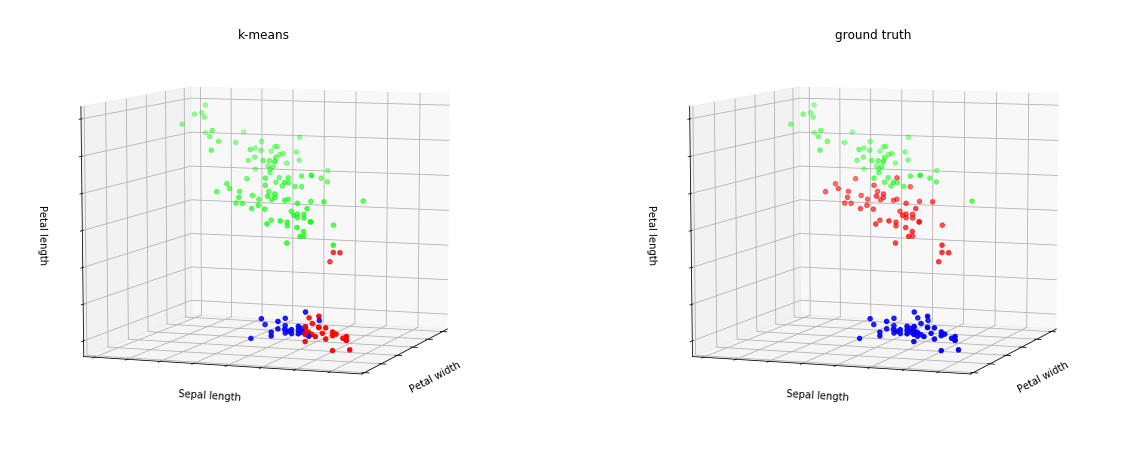

In [387]:
run_plot_kmeans_iris()

<div class="alert alert-success">
Here we can see how the k-means fails in modeling the three species, in fact we can see that we have two cluster at the bottom, while we should have only one.
This is quite bad because the points at the bottom are well separated by the others and it should be easy to cluster them. Unfortunately accidents happen when two initial centroids are very near and they contend the points with the same label.
Looking at the ground truth, we see very well that the 'blue' cluster is well separated, while the other two are one the continuation of the other and the borders are not well defined, this means that for the k-means it will be difficult to model in a good way these points.

We also note that we are plotting only three features over 4, and maybe they are not the most explicative ones, we will look at this later by using a different plot.
</div>

number of iterations: 3


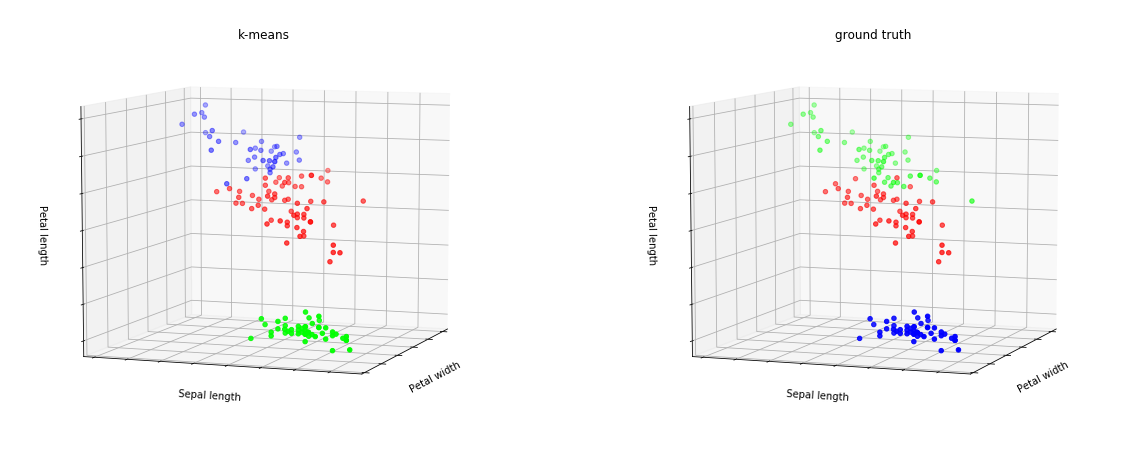

In [194]:
run_plot_kmeans_iris()

<div class="alert alert-success">
A second run revealed us that the k-means can model our dataset in a better way, this means that the k-means has an unpredictable evoultion that depends from the initial position of the centroids.
In this case we perfectly modeled the points in the bottom cluster, while we made some mistakes with the points on the border of the clsuters at the top.
</div>

<div class="alert alert-success">
Regarding the number of iterations, we have seen that they are low, we think that this is due to the restricted number of points and their disposition
</div>

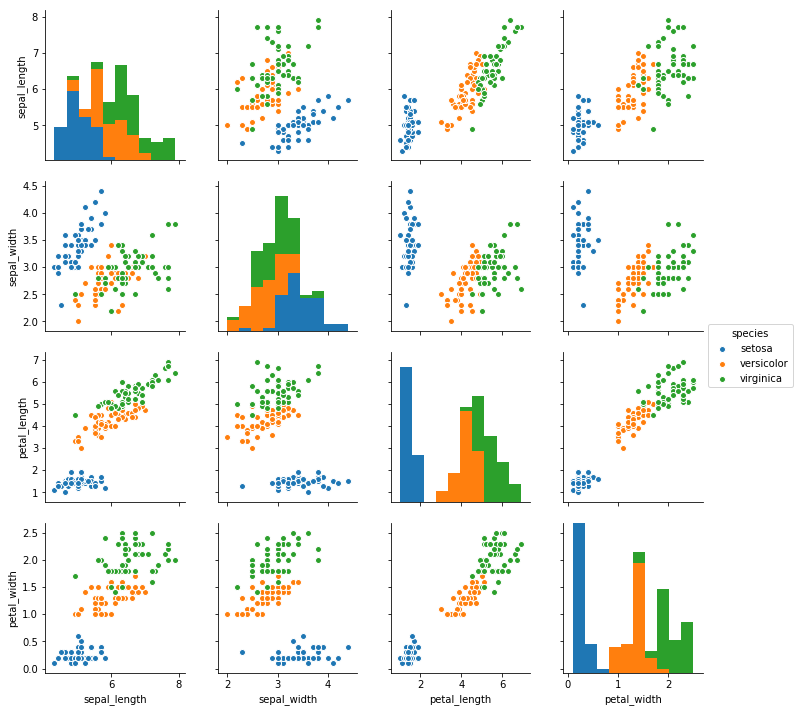

In [119]:
import seaborn as sns
sns.reset_orig()
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species",)
plt.show()

<div class="alert alert-success">
With this scatter matrix we plotted every combination of two features.
In the diagonal we have an histogram of each feature, we will first look at this.
<br>
Each histogram tell us how the species overlaps or are separated with respect the different features taken singularly.
We see for example that the 'petal lenght' and the 'petal width' can separate the 'setosa' species from the other two without additional features, in fact there are no overlaps.
Looking at `Versicolor` and `Virginica` we see that they completely overlap if we consider the sepal width and length, this means that the biggest problem is to separate these two species.
Looking at the 2D scatters we see that the points can be easily clustered by making some mispredictions on the border.


</div>


## moon

In [202]:
def run_plot_kmeans_moon(MAX_ITERATIONS=20):
    np.random.seed(0)
    X, y = datasets.make_moons(2000, noise=0.2)
    centers = kmeans(X, k=3,MAX_ITERATIONS=MAX_ITERATIONS)
    labels = [find_closest_centroid(p, centers) for p in X]

    fig=plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(121)
    
    ax1.scatter(X[:,0], X[:,1], s=40, c=labels, cmap=plt.cm.Spectral)
    ax2 = fig.add_subplot(122)
    ax2.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
    ax1.set_title('k-means')
    ax2.set_title('ground truth')

    plt.show()

number of iterations: 21


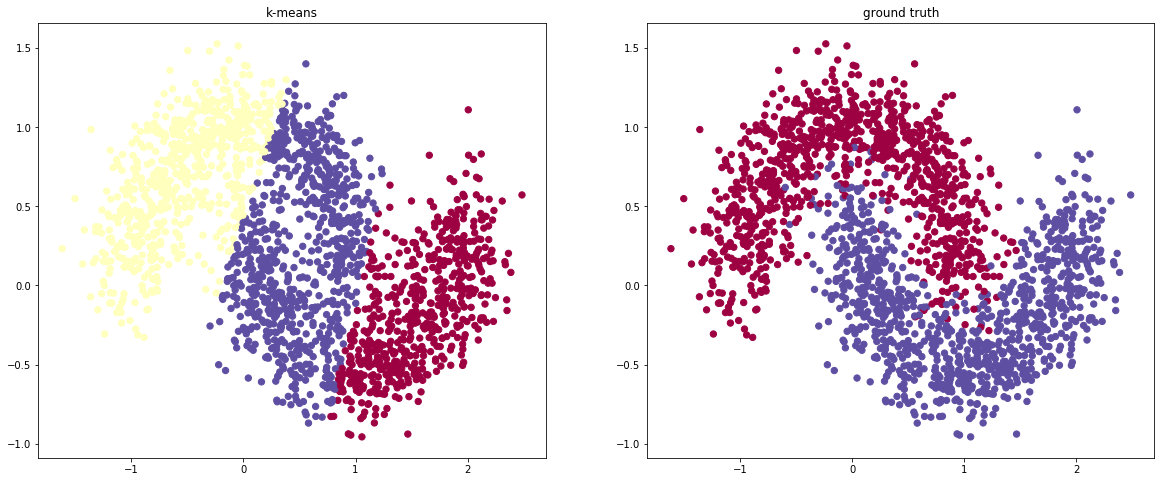

In [199]:
run_plot_kmeans_moon()

number of iterations: 35


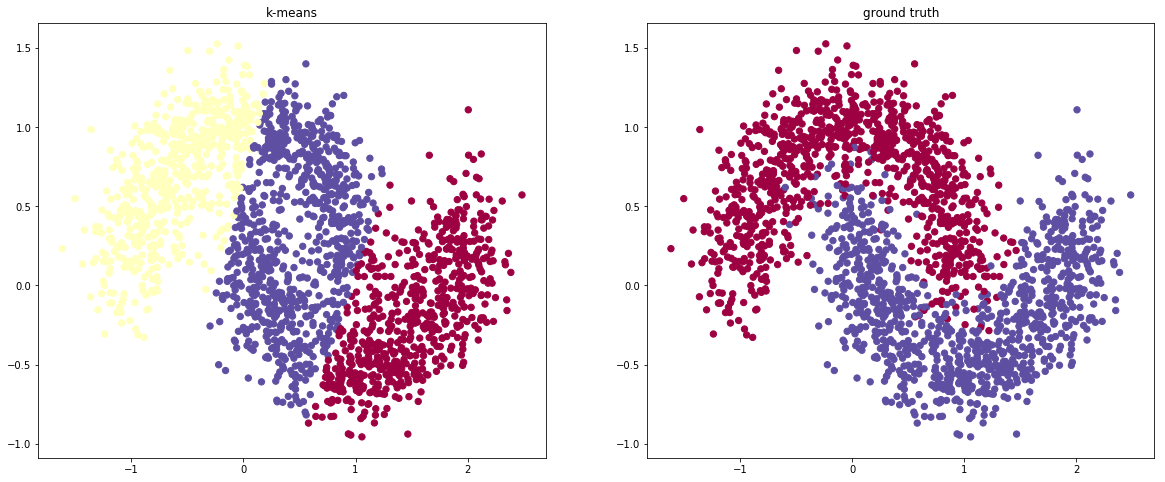

In [207]:
run_plot_kmeans_moon(100)

<div class="alert alert-success">
Here we see the main limitation of the k-means, it is not able to model complex shapes and it tends to create equally partitioned clusters, as it happens in this case. Looking at the number of iterations, here the k-means takes more iterations because the points are very near and they continuously change centroids, and this change position by consequence.

</div>

In [188]:
def run_plot_kmeans_blob(MAX_ITERATIONS=20):
    np.random.seed(0)
    X, y = datasets.make_blobs(n_samples=2000, centers=3, n_features=20, random_state=0)
    centers = kmeans(X, k=3,MAX_ITERATIONS=MAX_ITERATIONS)
    labels = [find_closest_centroid(p, centers) for p in X]

    fig=plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(121)
    
    ax1.scatter(X[:,0], X[:,1], s=40, c=labels, cmap=plt.cm.Spectral)
    ax2 = fig.add_subplot(122)
    ax2.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
    ax1.set_title('k-means')
    ax2.set_title('ground truth')

    plt.show()

number of iterations: 3


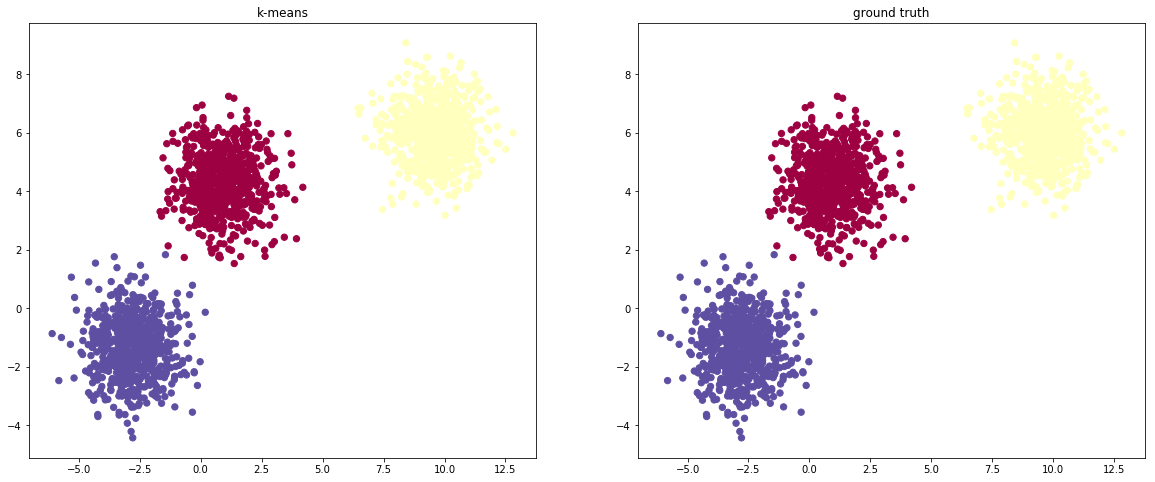

In [224]:
np.random.seed(0)
X, y = datasets.make_blobs(n_samples=2000, centers=3, n_features=20, random_state=0,shuffle=False)
centers = kmeans(X, k=3,MAX_ITERATIONS=MAX_ITERATIONS)
labels = [find_closest_centroid(p, centers) for p in X]

fig=plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121)

ax1.scatter(X[:,0], X[:,1], s=40, c=labels, cmap=plt.cm.Spectral)
ax2 = fig.add_subplot(122)
ax2.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
ax1.set_title('k-means')
ax2.set_title('ground truth')

plt.show()

number of iterations: 26


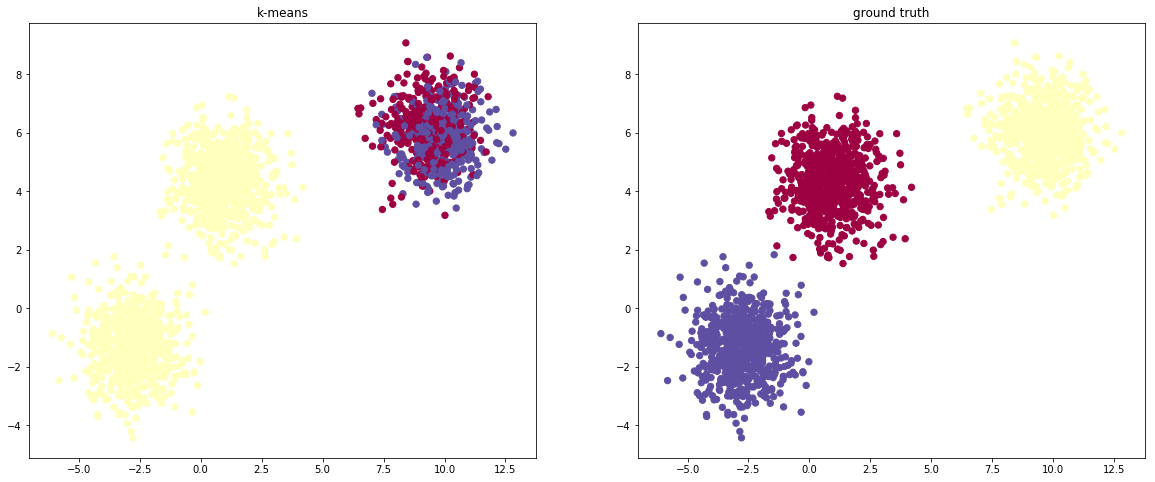

In [223]:
run_plot_kmeans_blob(100)

<div class="alert alert-success">
Here we see that the result dramatically change based on the position of the initial centroids.
Then, we see that also the number of iterations changes. This is bad because it means that in some corner cases the k-means takes a lot of time to run.

</div>

# todo: see how centroids move

That's enough about K-means for now. In the next section, we will apply MMLIB's K-means on Spark to deal with a large data in the real usecase.


# 2. Usecase: Network Intrusion 

Some attacks attempt to flood a computer with network traffic. In some other cases, attacks attempt to exploit flaws in networking software in order to gain unauthorized access to a computer. Detecting an exploit in an incredibly large haystack of network requests is not easy.

Some exploit behaviors follow known patterns such as scanning every port in a short of time, sending a burst of request to a port... However, the biggest threat may be the one that has never been detected and classified yet. Part of detecting potential network intrusions is detecting anomalies. These are connections that aren't known to be attacks, but, do not resemble connections that have been observed in the past.

In this notebook, K-means is used to detect anomalous network connections based on statistics about each of them.


## 2.1. Data
The data comes from [KDD Cup 1999](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html). The dataset is about 708MB and contains about 4.9M connections. For each connection, the data set contains information like the number of bytes sent, login attempts, TCP errors, and so on. Each connection is one line of CSV-formatted data, containing 38 features: back, buffer_overflow, ftp_write, guess_passwd, imap, ipsweep, land, loadmodule, multihop, neptune, nmap, normal, perl, phf, pod, portsweep, rootkit, satan, smurf, spy, teardrop, warezclient, warezmaster. For more details about each feature, please follow this [link](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html).

Many features take on the value 0 or 1, indicating the presence or absence of a behavior such as `su_attempted` in the 15th column. Some features are counts, like `num_file_creations` in the 17th columns. Some others are the number of sent and received bytes.

## 2.2. Clustering without using categorical features

First, we need to import some packages that are used in this notebook.

In [75]:
from time import time
import os
import sys
import re
from pyspark import SparkContext
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
#from pyspark.sql.functions import *
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyspark.sql.functions as func
import matplotlib.patches as mpatches
from pyspark.mllib.clustering import KMeans, KMeansModel
from operator import add

from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint
import itertools
input_path = "/datasets/k-means/kddcup.data"
raw_data = sc.textFile(input_path, 12)

### 2.2.1. Loading data

There are two types of features: numerical features and categorical features.
Currently, to get familiar with the data and the problem, we only use numerical features. In our data, we also have pre-defined groups for each connection, which we can use later as our "ground truth" for verifying our results.

**Note 1**: we don't use the labels in the training phase!!!

**Note 2**: in general, since clustering is un-supervised, you don't have access to ground truth. For this reason, several metrics to judge the quality of clustering have been devised. For a short overview of such metrics, follow this [link](https://en.wikipedia.org/wiki/Cluster_analysis#Internal_evaluation). Note that computing such metrics, that is trying to assess the quality of your clustering results, is as computationally intensive as computing the clustering itself!

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

#### Question 2
<div class="alert alert-info">

Write function `parseLine` to construct a tuple of `(label, vector)` for each connection, extract the data that contains only the data points (without label), then print the number of connections.

</div>

Where,

* `label` is the pre-defined label of each connection
* `vector` is a numpy array that contains values of all features, but the label and the categorial features at index `1,2,3` of each connection. Each `vector` is a data point.

```python
def parseLine(line):
    cols = line...
    # label is the last column
    label = ...
    
    # vector is every column, except the label
    vector = ...
    
    # delete values of columns that have index 1->3 (categorical features)
    ...
    
    # convert each value from string to float
    vector = np.array(...)
    
    return (label, vector)

labelsAndData = raw_data.map(...)

# we only need the data, not the label
data = labelsAndData...cache()

# number of connections
n = data....
```

In [76]:
def parseLine(line):
    cols = line.split(',')
    # label is the last column
    label = cols[-1]
    
    # vector is every column, except the label
    vector = cols[:-1]
    
    # delete values of columns that have index 1->3 (categorical features)
    vector = [x for (i,x) in enumerate(vector) if i not in [1, 2, 3]]
    
    # convert each value from string to float
    vector = np.array(vector, dtype=np.float)
    
    return (label, vector)

labelsAndData = raw_data.map(parseLine)

# we only need the data, not the label
data = labelsAndData.map(lambda row: row[1]).cache()

# number of connections
n = data.count()

In [23]:
print('number of rows: %d' % n)

number of rows: 4898431


In [4]:
n_distinct = raw_data.distinct().count()
print('number of distinct rows: %d' % n_distinct)

number of distinct rows: 1074992


<div class="alert alert-success">
Here we see a possible problem, in fact we have many rows with the same information and this can possibly make our model bad because we train it to predict in a better way the same points more times.
</div>

## data exploration

<div class="alert alert-info">

Here we want to explore the dataset and try to discover something of interesting.
</div>


In [26]:
labels_dict = labelsAndData.countByKey()

In [29]:
labels = []
counts = []
for label in labels_dict:
    labels.append(label)
    counts.append(labels_dict[label])

In [35]:
labels_dict

defaultdict(int,
            {'back.': 2203,
             'buffer_overflow.': 30,
             'ftp_write.': 8,
             'guess_passwd.': 53,
             'imap.': 12,
             'ipsweep.': 12481,
             'land.': 21,
             'loadmodule.': 9,
             'multihop.': 7,
             'neptune.': 1072017,
             'nmap.': 2316,
             'normal.': 972781,
             'perl.': 3,
             'phf.': 4,
             'pod.': 264,
             'portsweep.': 10413,
             'rootkit.': 10,
             'satan.': 15892,
             'smurf.': 2807886,
             'spy.': 2,
             'teardrop.': 979,
             'warezclient.': 1020,
             'warezmaster.': 20})

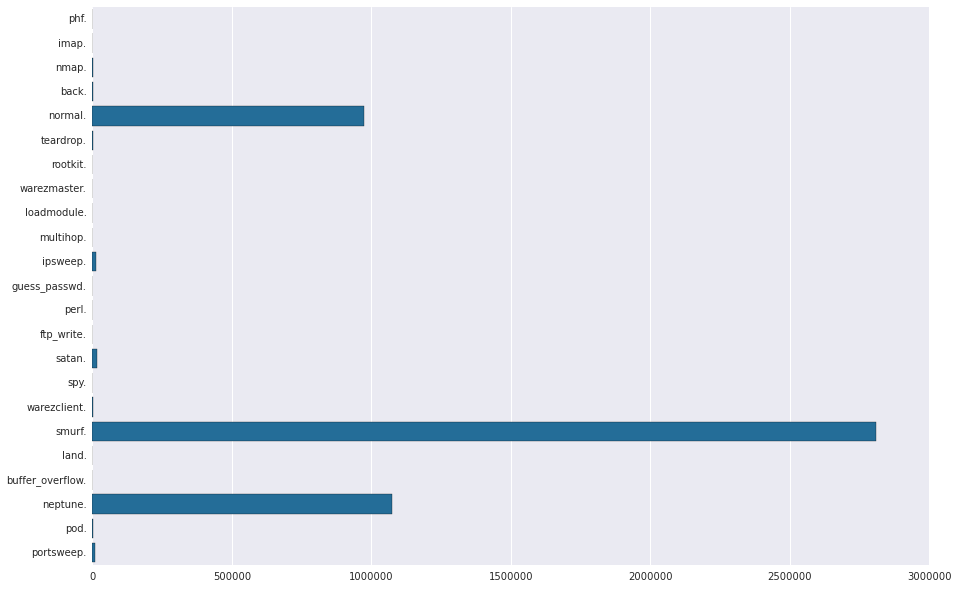

In [38]:
plt.figure(figsize=(15, 10))
sns.barplot(x=counts,y=labels,color='#1172ab')
plt.show()

<div class="alert alert-success">
Here we see that most of the connections are in three well defined groups: normal, neptune and smurf. All the other groups have a low number of connections. But why?
<br>
The fact that there are millions of connections in the normal group is not strange, normal traffic should be always the norm.
Looking at the other two groups we discovered this:
<br>
The smurf group is large because it labels connections that are part of a smurf attack, that by definition is a distributed denial-of-service attack in which large numbers of Internet Control Message Protocol (ICMP) packets with the intended victim's spoofed source IP are broadcast to a computer network using an IP broadcast address. https://en.wikipedia.org/wiki/Smurf_attack
<br>
The neptune group is large for the same reason, in fact it  can be distinguished from normal network traffic by looking for a number of simultaneous SYN packets destined for a particular machine that are coming from an unreachable host. https://www.ll.mit.edu/ideval/docs/attackDB.html

<br>
<br>
Regarding the other groups, we think that they are attacks that do not require a lot of connections, thus we do not have many connections with this labels.

</div>

In [25]:
numfield = labelsAndData.map(lambda row: len(row[1])).distinct().collect()

In [26]:
print('number of fields: %s' % set(numfield))

number of fields: {38}


<div class="alert alert-success">
All rows have the same number of labels. At least from this point of view, our data is correct
</div>

In [11]:
FEATURES = [
'duration: continuous.', \
'src_bytes: continuous.', \
'dst_bytes: continuous.', \
'land: symbolic.', \
'wrong_fragment: continuous.', \
'urgent: continuous.', \
'hot: continuous.', \
'num_failed_logins: continuous.', \
'logged_in: symbolic.', \
'num_compromised: continuous.', \
'root_shell: continuous.', \
'su_attempted: continuous.', \
'num_root: continuous.', \
'num_file_creations: continuous.', \
'num_shells: continuous.', \
'num_access_files: continuous.', \
'num_outbound_cmds: continuous.', \
'is_host_login: symbolic.', \
'is_guest_login: symbolic.', \
'count: continuous.', \
'srv_count: continuous.', \
'serror_rate: continuous.', \
'srv_serror_rate: continuous.', \
'rerror_rate: continuous.', \
'srv_rerror_rate: continuous.', \
'same_srv_rate: continuous.', \
'diff_srv_rate: continuous.', \
'srv_diff_host_rate: continuous.', \
'dst_host_count: continuous.', \
'dst_host_srv_count: continuous.', \
'dst_host_same_srv_rate: continuous.', \
'dst_host_diff_srv_rate: continuous.', \
'dst_host_same_src_port_rate: continuous.', \
'dst_host_srv_diff_host_rate: continuous.', \
'dst_host_serror_rate: continuous.', \
'dst_host_srv_serror_rate: continuous.', \
'dst_host_rerror_rate: continuous.', \
'dst_host_srv_rerror_rate: continuous.']

In [28]:
samples = data.randomSplit([10, 90])[0].collect()

In [29]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from statsmodels.nonparametric.kde import KDEUnivariate
import matplotlib.pyplot as plt
import scipy
import math

def plotDistribution(samples, show=True):
    #print(samples)
    vmin = np.min(samples)
    vmax = np.max(samples)
    stddev = np.std(samples)
    
    domain = np.arange(vmin, vmax, (vmax-vmin)/100)
    
    # a simple heuristic to select bandwidth
    bandwidth = 1.06 * stddev * math.pow(len(samples), -.2)
    
    # estimate density
    kde = KDEUnivariate(samples)
    kde.fit(bw=bandwidth)
    density = kde.evaluate(domain)
    
    # plot
    if show:
        plt.plot(domain, density)
        plt.show()
    else:
        return domain,density

In [30]:
columns_zip = list(zip(*samples))

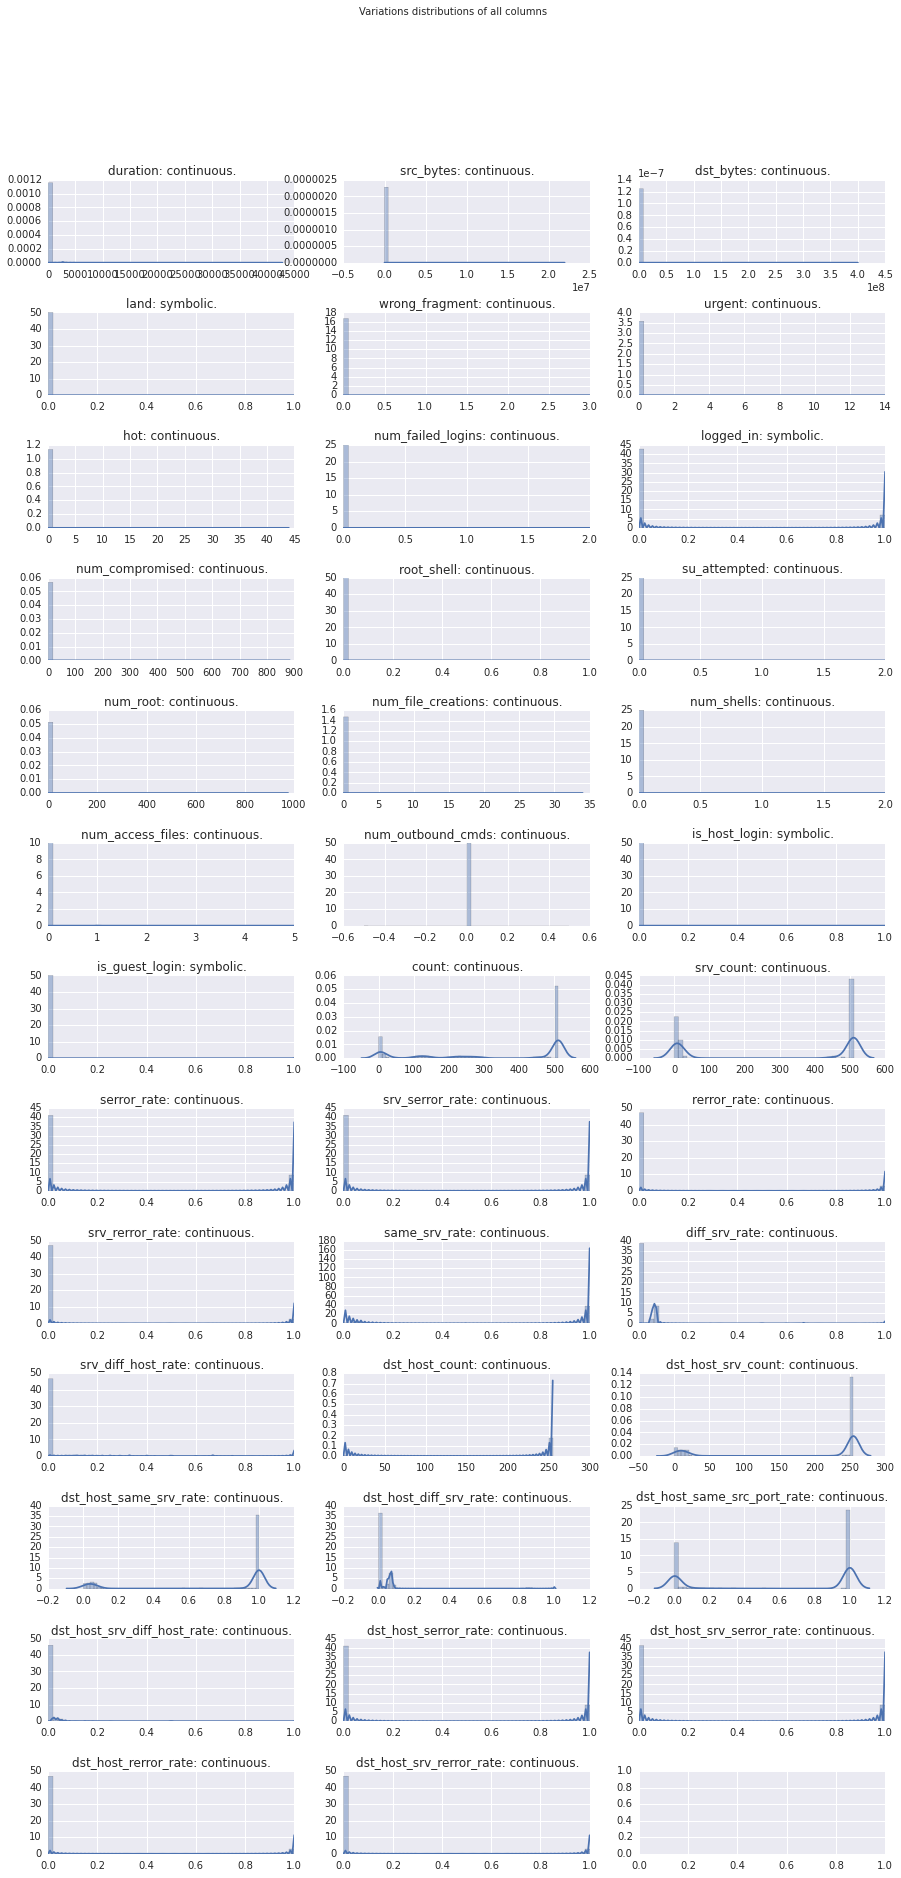

In [31]:
nCols = 3
nRows = int(np.ceil(len(columns_zip)/nCols))
f , axarr = plt.subplots(nRows, nCols)
f.suptitle("Variations distributions of all columns",)
f.set_figwidth(15)
f.set_figheight(30)
for idx, samples in enumerate(columns_zip):
    i, j = divmod(idx, nCols)
    ax = axarr[i, j]
    ax.set_title(FEATURES[idx])
    sns.distplot(samples,ax = ax)
f.subplots_adjust(hspace=0.6)

<div class="alert alert-success">
Here we see that in many fields our data tends to have one value or is bipolar, this means that it should be quite easy to find well separated cluster, avoiding cases where points cannot be easily separated.
We still need to pay attention because this plot is based on 10% of the data, so some dimensions might be partially wrong.
</div>  

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

#### Question 3
<div class="alert alert-info">

Using K-means algorithm of MLLIB, cluster the connections into two groups then plot the result. Why two groups? In this case, we are just warming up, we're testing things around, so "two groups" has no particular meaning.

</div>  

You can use the following parameters:  

<ul>

  <li>`maxIterations=10`</li>
  <li>`runs=10`</li>
  <li>`initializationMode="random"`</li>

</ul>  

Discuss the result from your figure.

```python
clusters = KMeans....
```

In [81]:
t1 = time()
clusters = KMeans.train(data, 2, maxIterations=10, runs=10, initializationMode="random")
print(time() - t1)

/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


5.8410913944244385


Check the number of centers, they should be 2

In [82]:
clusters.centers

[array([  2.39818000e+04,   7.72485538e+08,   2.61987480e+08,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e-01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.22000000e+01,   1.40000000e+00,
          1.58000000e-01,   1.34000000e-01,   8.42000000e-01,
          8.66000000e-01,   8.10000000e-01,   7.80000000e-02,
          0.00000000e+00,   1.48200000e+02,   1.40000000e+00,
          8.00000000e-03,   2.12000000e-01,   2.82000000e-01,
          0.00000000e+00,   3.60000000e-02,   1.34000000e-01,
          2.48000000e-01,   8.66000000e-01]),
 array([  4.83180007e+01,   1.04611921e+03,   8.26203865e+02,
          5.71612187e-06,   6.48779833e-04,   7.96174118e-06,
          1.24374646e-02,   3.20511119e-05,   1.43529166e-01,
          8.08831245e-03

<div class="alert alert-success">
As expected, we have 2 clusters with 38 dimensions.
</div>  

In [83]:
stdev = data.stdev()
print(stdev)

[  7.23329737e+02   9.41430978e+05   6.45012268e+05   2.39083319e-03
   4.28543324e-02   7.21508295e-03   4.68978117e-01   7.29940683e-03
   3.50611523e-01   3.85648064e+00   8.25714534e-03   8.08243095e-03
   3.93807490e+00   1.24185736e-01   8.73758872e-03   3.55104777e-02
   0.00000000e+00   6.38978745e-04   2.88871577e-02   2.11990761e+02
   2.45992685e+02   3.81875553e-01   3.82254047e-01   2.32252900e-01
   2.32660379e-01   3.89295798e-01   8.27145751e-02   1.40559550e-01
   6.40209308e+01   1.05912757e+02   4.11185973e-01   1.08543203e-01
   4.80987669e-01   4.12597750e-02   3.81838168e-01   3.82177399e-01
   2.30942796e-01   2.30977686e-01]


In [84]:
best_indexes = [t[0] for t in sorted(enumerate(stdev), key=lambda x: x[1],reverse=True)[:3]]
print('selected indices:' + str(best_indexes))

selected indices:[1, 2, 0]


The three first features (those that have the greatest variance) are :
* duration
* src_bytes
* dst_bytes

In [85]:
samples = data.randomSplit([10, 90])[0]

rdd0 = data.filter(lambda p: clusters.predict(p)==0)
rdd1 = data.filter(lambda p: clusters.predict(p)==1)
center0 = clusters.centers[0]
center1 = clusters.centers[1]
print('elements in cluster 0: %d' % rdd0.count())
print('elements in cluster 1: %d' % rdd1.count())

elements in cluster 0: 5
elements in cluster 1: 4898426


<div class="alert alert-success">
The number of points in the two clusters is highly unbalanced
</div>  

In [86]:
cluster0 = rdd0.take(50)
cluster0_axes = np.array([[point[i] for i in best_indexes] for point in cluster0])
cluster1 = rdd1.take(50)
cluster1_axes = np.array([[point[i] for i in best_indexes] for point in cluster1])
M = max(max(cluster1_axes.flatten()), max(cluster0_axes.flatten()))

/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


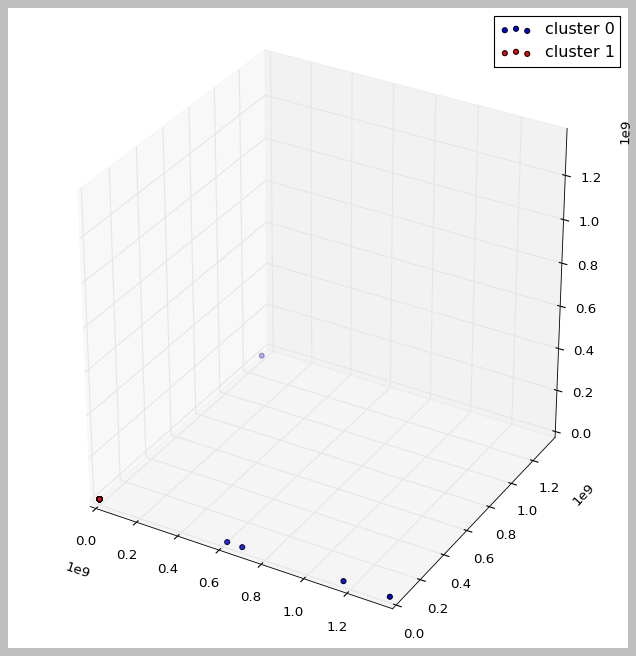

In [91]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster0_axes[:, 0], cluster0_axes[:, 1], cluster0_axes[:, 2], c="b")
ax.scatter(cluster1_axes[:, 0], cluster1_axes[:, 1], cluster1_axes[:, 2], c="r")
ax.set_xlim(0, M)
ax.set_ylim(0, M)
ax.set_zlim(0, M)
ax.legend(["cluster 0", "cluster 1"])
plt.show()

<div class="alert alert-success">
Here we can see that the axis chosen to project our data are those with the highest values, in fact we do not do any normalization, so it is quite normal that the dimensions with larger values are those with the highest variance.

We see that the cluster 0 contains only 5 values, while all the other points are in the cluster 1.

In the plot we can see that all the points of cluster 1 are in a very small place while the points in cluster 0 are spread over all the space. We think that this few points are responsible for the position of the cluster 0 because they are really far from the others.
<br>
<br>
This actually explains very well why we need to normalize our data, because otherwise a single dimension can drive the result of the clustering.
</div>

### 2.2.3. Evaluating model

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

#### Question 4
<div class="alert alert-info">

One of the simplest method to evaluate our result is calculate the Within Set Sum of Squared Errors (wssse), or simply, 'Sum of Squared Errors'. An error of a data point is defined as it's distance to the closest cluster center.

</div>


```python
from operator import add

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(clusters, point):
    closest_center = ...
    return ...

wssse = data.map(...).reduce(...)
print("Within Set Sum of Squared Error = " + str(wssse))
```

In [23]:
def euclidean_distance_1(a, b):
    c = a-b
    return np.sqrt(c.T.dot(c))

In [24]:
from operator import add
t1 = time()
# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(clusters, point):
    closest_center = clusters.centers[clusters.predict(point)]
    return euclidean_distance_1(closest_center, point)**2

wssse = data.map(lambda point: error(clusters, point)).reduce(add)
print("Within Set Sum of Squared Error = " + str(wssse))
print(time() - t1)

Within Set Sum of Squared Error = 6.37937321457e+18
21.183277368545532


Let's use the predefined method to calculate the error

In [25]:
from operator import add
t1 = time()
print("Within Set Sum of Squared Error = " + str(clusters.computeCost(data)))
print(time() - t1)

Within Set Sum of Squared Error = 6.379373214570355e+18
4.644611358642578


<div class="alert alert-success">
Using the built in function we see that performances are way higher. We also have the confirmation that our method is correct.
</div>

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)


#### Question 5

<div class="alert alert-info">

This is a good opportunity to use the given labels to get an intuitive sense of what went into these two clusters, by counting the labels within each cluster. Complete the following code that uses the model to assign each data point to a cluster, and counts occurrences of cluster and label pairs.  

What do you think about the result?

</div>

```python
clusterLabelCount = ...

for item in clusterLabelCount:
    print(item)
```

In [26]:
clusterLabelCount = labelsAndData.map(lambda row: ((clusters.predict(row[1]), row[0]), 1)).reduceByKey(add)

for item in clusterLabelCount.collect():
    print(item)

((0, 'smurf.'), 2807886)
((1, 'imap.'), 11)
((1, 'teardrop.'), 979)
((0, 'normal.'), 115306)
((0, 'pod.'), 264)
((0, 'ftp_write.'), 2)
((0, 'multihop.'), 1)
((1, 'satan.'), 15885)
((1, 'portsweep.'), 10403)
((1, 'land.'), 21)
((1, 'guess_passwd.'), 53)
((1, 'multihop.'), 6)
((1, 'neptune.'), 1072016)
((1, 'normal.'), 857475)
((1, 'nmap.'), 2316)
((0, 'back.'), 2203)
((0, 'warezclient.'), 123)
((1, 'warezmaster.'), 20)
((1, 'phf.'), 4)
((1, 'warezclient.'), 897)
((0, 'satan.'), 7)
((1, 'spy.'), 2)
((1, 'loadmodule.'), 9)
((1, 'rootkit.'), 10)
((1, 'ftp_write.'), 6)
((0, 'imap.'), 1)
((0, 'neptune.'), 1)
((1, 'ipsweep.'), 12481)
((1, 'perl.'), 3)
((0, 'portsweep.'), 10)
((1, 'buffer_overflow.'), 30)


In [27]:
clusterLabelCount.count()

31

<div class="alert alert-success">
Note: since the results of the random k-means are variable, these are consideration based on this single run.
</div>

<div class="alert alert-success">
Here we see that using only two cluster we can actually cluster very well some attacks, such as the 'smurf' attack, in fact all the connections labeled as 'smurf' are in the cluster 0.
Unfortunately this does not happen for all the labels, for example we have 'warezclient' connections in both clusters.
</div>

### 2.2.4. Choosing K

How many clusters are appropriate for a dataset? In particular, for our own dataset, it's clear that there are 23 distinct behavior patterns in the data, so it seems that k could be at least 23, or likely, even more. In other cases, we even don't have any information about the number of patterns at all (remember, generally your data is not labelled!). Our task now is finding a good value of $k$. For doing that, we have to build and evaluate models with different values of $k$. A clustering could be considered good if each data point were near to its closest centroid. One of the ways to evaluate a model is calculating the Mean of Squared Errors of all data points.

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

#### Question 6
<div class="alert alert-info">
Complete the function below to calculate the MSE of each model that is corresponding to each value of $k$.  


Plot the results. From the obtained result, what is the best value for $k$? Why?

</div>

In [27]:
import seaborn as sns
sns.set_style("darkgrid")

```python
# k: the number of clusters
def clusters_score(data, k):
    clusters = KMeans....
    # calculate mean square error
    return ...

scores = ...
for score in scores:
    print(score)
    
# plot results
plt...
```

/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


6.379392046834212e+18
1.1650557472419576e+18
3.052548957548266e+18
1.0947299297423852e+18
1.1581859840177636e+18
1.1415563379822223e+18
1.158166054659545e+18
9.943260950421786e+17
1.0948266465354822e+18
1.0946301510021748e+18
1.0944655262640275e+18
1.0946447548371168e+18
9.90584525984178e+17
1.0932096571163343e+18
1.0929300311046455e+18
9.904652132579277e+17
9.6604450693646e+17
9.660947235173815e+17
9.905024713161825e+17
9.659924160985503e+17
9.905605966770728e+17
9.660052011242436e+17
9.90480053110417e+17


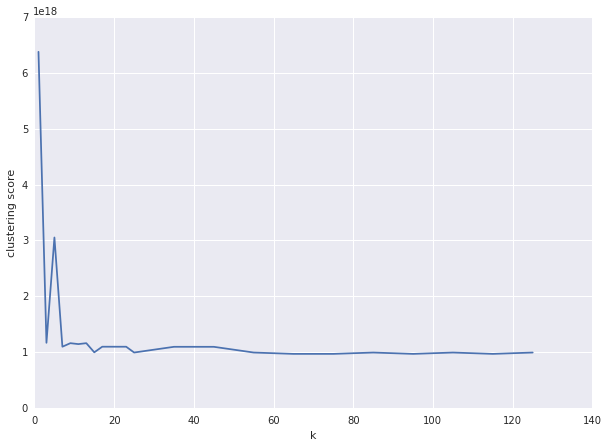

In [30]:
plt.figure(figsize=(10, 7))
plt.xlabel('k')
plt.ylabel('clustering score')

k_range = list(range(1,24,2)) + list(range(25,126,20))

# k: the number of clusters

def clusters_score(data, k):
    clusters = KMeans.train(data, k, maxIterations=10, runs=10, initializationMode="random")
    wssse = clusters.computeCost(data)
    return wssse

scores = [clusters_score(data, k) for k in k_range]
for score in scores:
    print(score)
# plot results
plt.plot(k_range, scores)    
plt.show()

<div class="alert alert-success">
We see that moving from 1 cluster to 10 the error decreases of a factor 10, then it remains the same. In theory the error should always decrease. We also think that the results have a high variance, we will check it later.
</div>

In [163]:
def clusters_score(data, k):
        t0 = time()
        clusters = KMeans.train(data, k, maxIterations=10, runs=10, initializationMode="random")
        t1 = time()
        wssse = clusters.computeCost(data)
        t2 = time()
        return (wssse,t1-t0,t2-t1,t2-t0)

scores = []
k_runs = list(range(1,24,2)) + list(range(25,106,20))

scores = []
for run in range(5):
    score_run = []
    for k in k_runs:
        # k: the number of clusters

        score = clusters_score(data, k)

        score_run.append((k,*score))
        #print(score,t1-t0)

    scores.append(score_run)

/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


In [169]:
import json
with open('kmeans_random_1.csv', "w") as file:
    json.dump(scores,file)

In [170]:
with open('kmeans_random_1.csv', "r") as file:
    scores = json.load(file)

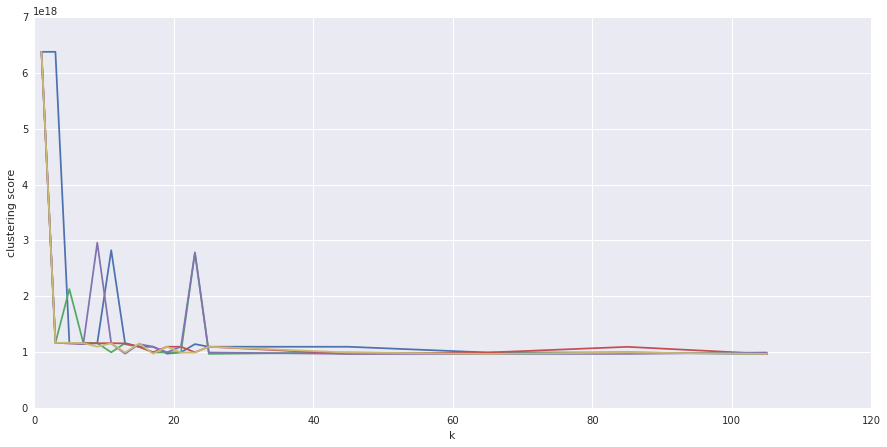

In [171]:
plt.figure(figsize=(15, 7))
plt.xlabel('k')
plt.ylabel('clustering score')
for score in scores:
    plt.plot(k_runs, list(zip(*score))[1])

<div class="alert alert-success">
The clustering error should decrease when k increases, and in the hypotesis that we have a number of clusters equal to the number of points, it should be zero.
Here we see this pattern only when we move from 1 to 7 clusters, but then there is no more a tangible improvement. We think that this is due to the fact that initial centroids are random and the data is spread quite badly in a metric space that is not normalized.
We can also see that different runs follow different patterns, exactly how we expected. 
<br>
The initial centroids are chosen randomly and this can lead to very different final clusters.
This means that in order to have some general data we need to run many times the kmeans and than average.
</div>

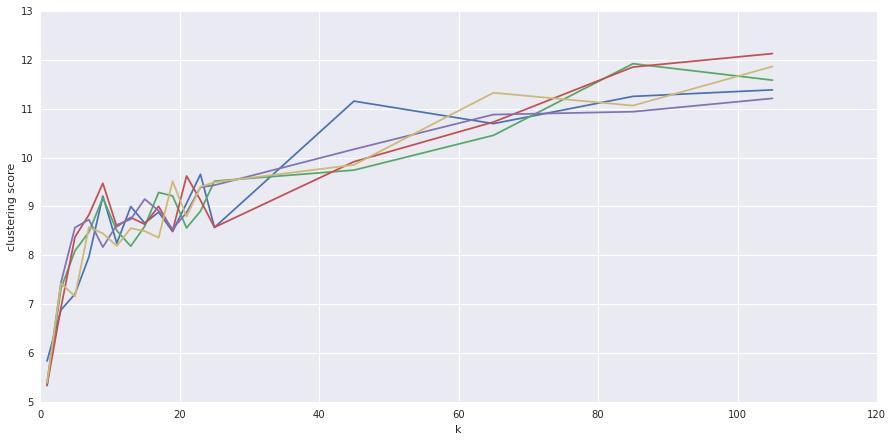

In [172]:
plt.figure(figsize=(15, 7))
plt.xlabel('k')
plt.ylabel('clustering score')
for score in scores:
    plt.plot(k_runs, list(zip(*score))[2])

<div class="alert alert-success">
Note: the y axes is actually the time in seconds. 
<br>
Here we see that there is a correlation between the number of clusters and the training time.The pattern is clear, when k increases, the time required increases too. Expecially when we have few clusters we see that the increments of time is big and then it follow a proportional pattern that has a very low slope.
</div>

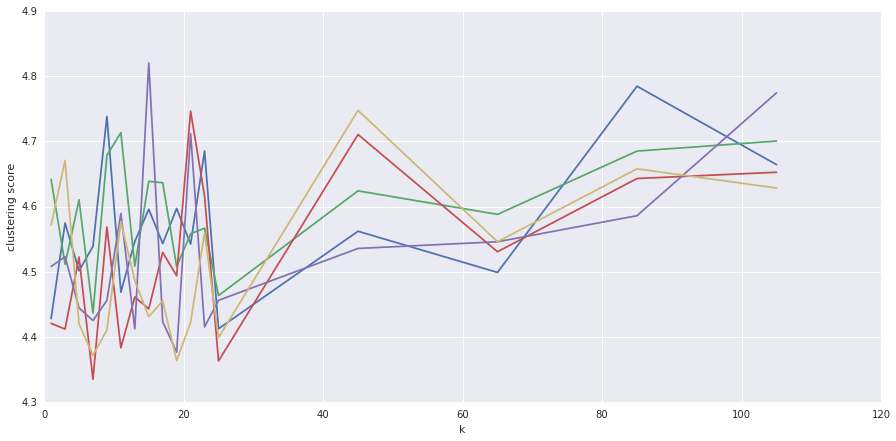

In [174]:
plt.figure(figsize=(15, 7))
plt.xlabel('k')
plt.ylabel('clustering score')
for score in scores:
    plt.plot(k_runs, list(zip(*score))[3])

<div class="alert alert-success">
Note: the y axes is actually the time in seconds. 
<br>
Here we plotted the time required to calculate the score respect to the number of clusters. We see that the time required is always around 4.5 seconds, so we can say that what we see is basically noise given by the servers conditions. This is actually a good news because it means that the number of cluster is not a limit regarding the validation of this.
</div>

### k-means||

<div class="alert alert-success">
The k-means|| is the spark implementation of the kmeans++. Since it is the default mode of the algorithm, we think that it is better than the random one.
</div>

In [175]:
def clusters_score(data, k):
        t0 = time()
        clusters = KMeans.train(data, k, maxIterations=10, runs=10, initializationMode="k-means||")
        t1 = time()
        wssse = clusters.computeCost(data)
        t2 = time()
        return (wssse,t1-t0,t2-t1,t2-t0)

scores = []
k_runs = list(range(1,24,2)) + list(range(25,106,20))

scores = []
for run in range(5):
    score_run = []
    for k in k_runs:
        # k: the number of clusters

        score = clusters_score(data, k)

        score_run.append((k,*score))
        #print(score,t1-t0)

    scores.append(score_run)

/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


In [176]:
import json
with open('kmeans_++_1.csv', "w") as file:
    json.dump(scores,file)

In [2]:
import json
with open('kmeans_++_1.csv', "r") as file:
    scores = json.load(file)

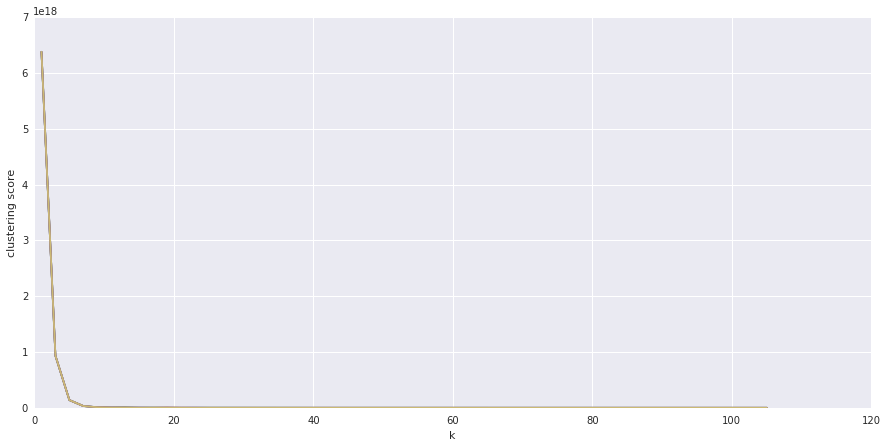

In [8]:
plt.figure(figsize=(15, 7))
plt.xlabel('k')
plt.ylabel('clustering score')
for score in scores:
    plt.plot(list(zip(*score))[0], list(zip(*score))[1])

<div class="alert alert-success">
Here we see that using the kmeans++ we obtain far better results, which for now means clusters with a lower score.
This is because now the initial centroids are chosen in a smart way, and we should also see a better running time.
<br>
We note that all the runs have the same pattern, this is good because it means that a run is highly representative of all runs, which means that we have a low uncertainty, so there is no need to do cross validation.
</div>

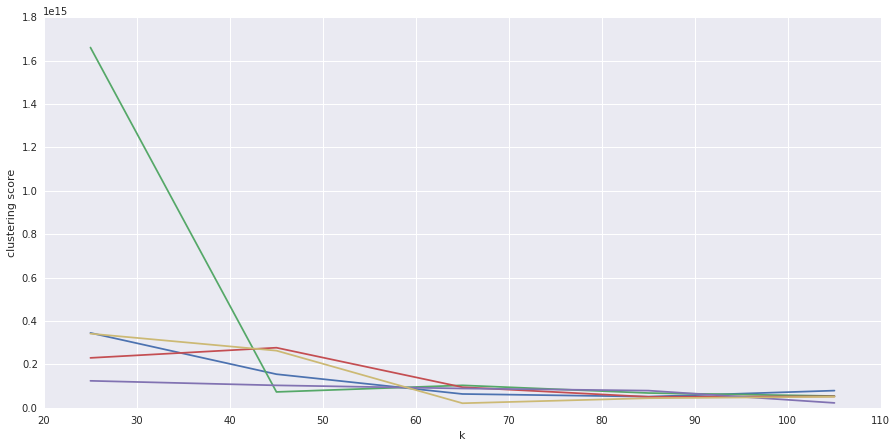

In [19]:
plt.figure(figsize=(15, 7))
plt.xlabel('k')
plt.ylabel('clustering score')
for score in scores:
    plt.plot(list(zip(*score))[0][-5:], list(zip(*score))[1][-5:])

<div class="alert alert-success">
When we focus only on k >25, we see that increasing the number of clusters brings to a lower score, and this happens in every run.
</div>

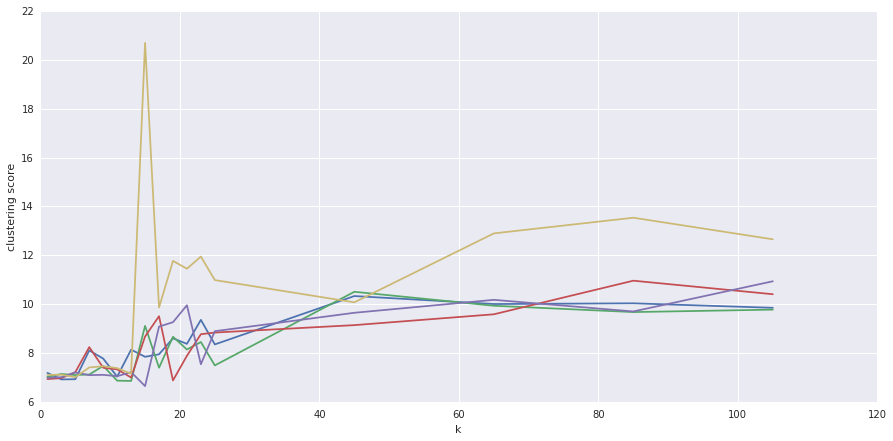

In [180]:
plt.figure(figsize=(15, 7))
plt.xlabel('k')
plt.ylabel('clustering score')
for score in scores:
    plt.plot(k_runs, list(zip(*score))[2])

<div class="alert alert-success">
Note: the y axes is actually the time in seconds. 
<br>
Regarding the training time, we see that it is quite stable around 10 seconds, moving from 20 to 100 clusters does not increase in a visible way the training time.
</div>

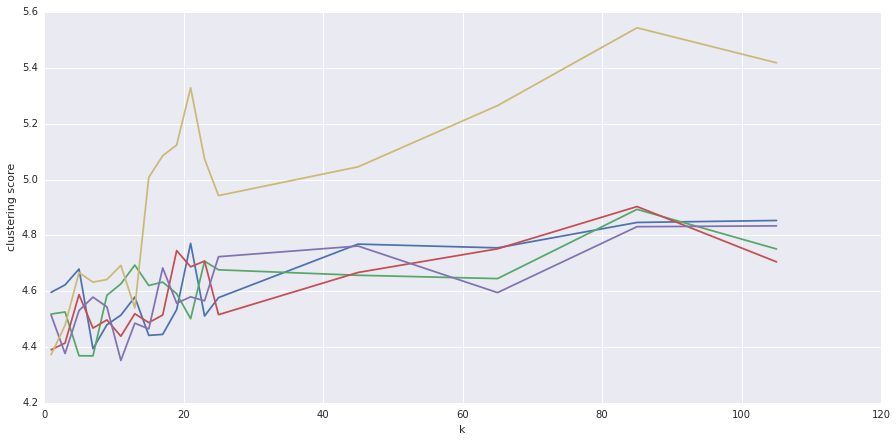

In [182]:
plt.figure(figsize=(15, 7))
plt.xlabel('k')
plt.ylabel('clustering score')
for score in scores:
    plt.plot(k_runs, list(zip(*score))[3])

<div class="alert alert-success">
Note: the y axes is actually the time in seconds. 
<br>
Regarding the score computation time, this is even more stable, differences are of the order of 0.1 seconds.
</div>

### What is the best k?

<div class="alert alert-success">
It seems that the random k-means does not improve after k=10, this is because the metric space is not normalized and the centers are chosen randomly.
<br>
Looking at the kmeans|| we see that it is much better and the score keeps decreasing with higher k, so we can state that the best k is 100.
<br>
With more centroids the distances between points and centroids are smaller, thus the wssse is smaller too.

</div>

### 2.2.5 Normalizing features

K-means clustering treats equally all dimensions/directions of the space and therefore tends to produce more or less spherical (rather than elongated) clusters. In this situation, leaving variances uneven is equivalent to putting more weight on variables with smaller variance, so clusters will tend to be separated along variables with greater variance.

In our notebook, since Euclidean distance is used, the clusters will be influenced strongly by the magnitudes of the variables, especially by outliers. Normalizing will remove this bias. 

Each feature can be normalized by converting it to a standard score. This means subtracting the mean of the feature’s values from each value, and dividing by the standard deviation

$normalize_i=\frac{feature_i - \mu_i}{\sigma_i}$

Where,

* $normalize_i$ is the normalized value of feature $i$
* $\mu_i$ is the mean of feature $i$
* $\sigma_i$ is the standard deviation of feature $i$


![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

#### Question 7
<div class="alert alert-info">

Complete the code below to normalize the data. Print the first 5 lines of the new data.

</div>

<div class="label label-success">HINT</div> If $\sigma_i = 0$ then $normalize_i=feature_i - \mu_i$

```python
def normalizeData(data):
    # number of connections
    n = ...

    # calculate the sum of each feature
    sums = ...
    print(sums)

    # calculate means
    means = ...

    # calculate the sum square of each feature
    sumSquares = ...
    print(sumSquares)

    # calculate standard deviation of each feature
    stdevs = ...
    print(stdevs)

    def normalize(point):
        return ...

    return data.map(normalize)

normalizedData = normalizeData(data).cache()
print(normalizedData.take(5))
```

In [41]:
def normalizeData(data):
    # number of connections
    n = data.count()
   
    means = data.reduce(add)/n
    
    sumSquares = data.map(lambda x: (x-means)**2).reduce(add)
    stdevs = np.sqrt(sumSquares / n)
    
    stdevs[stdevs==0] = 1

    def normalize(point):
        return (point - means) / stdevs
    return data.map(normalize)
t0 = time()
normalizedData = normalizeData(data).cache()
t1 = time()
print(normalizedData.take(2))
print(data.take(2))
print('Time taken to normalize:', t1-t0)

[array([ -6.68331854e-02,  -1.72038228e-03,   6.81884351e-02,
        -2.39084686e-03,  -1.51391734e-02,  -1.10348462e-03,
        -2.65207600e-02,  -4.39091558e-03,   2.44279187e+00,
        -2.09732783e-03,  -8.25770840e-03,  -4.54646139e-03,
        -3.28458917e-03,  -9.57233922e-03,  -8.50457842e-03,
        -2.87561127e-02,   0.00000000e+00,  -6.38979005e-04,
        -2.89113034e-02,  -1.57541507e+00,  -1.19624324e+00,
        -4.66042614e-01,  -4.65755574e-01,  -2.48285775e-01,
        -2.48130352e-01,   5.39733093e-01,  -2.56056520e-01,
        -2.01059296e-01,  -3.63913926e+00,  -1.78651044e+00,
        -1.83302273e+00,  -2.82939000e-01,  -1.25793664e+00,
        -1.56668488e-01,  -4.66404784e-01,  -4.65453641e-01,
        -2.50831829e-01,  -2.49631966e-01]), array([ -6.68331854e-02,  -1.77667956e-03,   5.32451452e-03,
        -2.39084686e-03,  -1.51391734e-02,  -1.10348462e-03,
        -2.65207600e-02,  -4.39091558e-03,   2.44279187e+00,
        -2.09732783e-03,  -8.25770840e-

<div class="alert alert-success">
Now we try to use the builtin method of the rdd to calculate the standard deviation
</div>

In [77]:
def normalizeData(data):
    # number of connections
    n = data.count()
   
    means = data.reduce(add) / n
    
    stdevs = data.stdev()
    
    stdevs[stdevs==0] = 1

    def normalize(point):
        return (point - means) / stdevs
    return data.map(normalize)
t0 = time()
normalizedData = normalizeData(data).cache()
t1 = time()
print(normalizedData.take(2))
print(data.take(2))
print('Time taken to normalize:', t1-t0)

[array([ -6.68331854e-02,  -1.72038228e-03,   6.81884351e-02,
        -2.39084686e-03,  -1.51391734e-02,  -1.10348462e-03,
        -2.65207600e-02,  -4.39091558e-03,   2.44279187e+00,
        -2.09732783e-03,  -8.25770840e-03,  -4.54646139e-03,
        -3.28458917e-03,  -9.57233922e-03,  -8.50457842e-03,
        -2.87561127e-02,   0.00000000e+00,  -6.38979005e-04,
        -2.89113034e-02,  -1.57541507e+00,  -1.19624324e+00,
        -4.66042614e-01,  -4.65755574e-01,  -2.48285775e-01,
        -2.48130352e-01,   5.39733093e-01,  -2.56056520e-01,
        -2.01059296e-01,  -3.63913926e+00,  -1.78651044e+00,
        -1.83302273e+00,  -2.82939000e-01,  -1.25793664e+00,
        -1.56668488e-01,  -4.66404784e-01,  -4.65453641e-01,
        -2.50831829e-01,  -2.49631966e-01]), array([ -6.68331854e-02,  -1.77667956e-03,   5.32451452e-03,
        -2.39084686e-03,  -1.51391734e-02,  -1.10348462e-03,
        -2.65207600e-02,  -4.39091558e-03,   2.44279187e+00,
        -2.09732783e-03,  -8.25770840e-

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

#### Question 8
<div class="alert alert-info">

Using the new data, build different models with different values of $k \in [60,70,80,90,100,110]$. Evaluate the results by plotting them and choose the best value of $k$.

</div>

```python
scores = ...
for score in scores:
    print(score)

plt...
```

In [18]:
def clusters_score(data, k):
    clusters = KMeans.train(data, k, maxIterations=10, runs=10, initializationMode="random")
    wssse = clusters.computeCost(data)
    return wssse

In [64]:
k_runs = [60,70,80,90,100,110]

scores = [clusters_score(normalizedData, k) for k in k_runs]
for score in scores:
    print(score)

/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


71372708.17815565
73755753.70316769
58460731.07771193
66433618.13995592
55708953.466314234
69000965.6717801


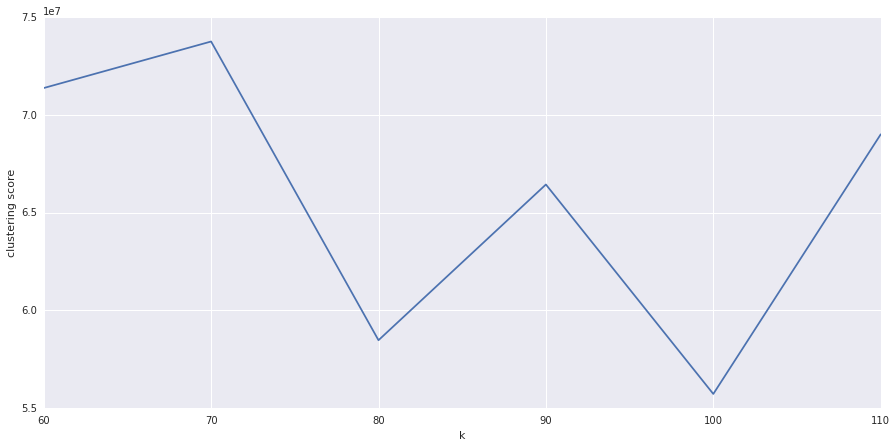

In [65]:
plt.figure(figsize=(15, 7))
plt.xlabel('k')
plt.ylabel('clustering score')

plt.plot(k_runs, scores)

<div class='alert alert-success'>
We see that after 60 clusters the score tends to decrease, but different runs show diferent results, so the initial placement of centroids is still fundamental.
We can also appreciate that now the error is way lower, in fact it is under 10^7. This is due to the normalization.
<br>
We can conclude that the algorithm doesn't find the best centroids.
</div>

### kmeans||

In [66]:
def clusters_score(data, k):
        clusters = KMeans.train(data, k, maxIterations=10, runs=10, initializationMode="k-means||")
        wssse = clusters.computeCost(data)
        return wssse

In [67]:
k_runs = [60,70,80,90,100,110]

scores = [clusters_score(normalizedData, k) for k in k_runs]
for score in scores:
    print(score)

/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


5347756.407105975
4988158.200382956
4212750.098642026
3603131.683360949
3231704.8107676427
2838348.866417648


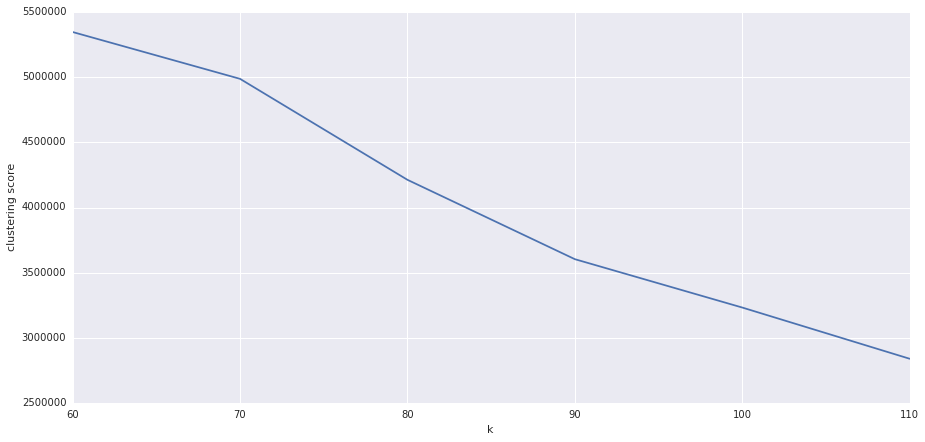

In [68]:
plt.figure(figsize=(15, 7))
plt.xlabel('k')
plt.ylabel('clustering score')
plt.plot(k_runs, scores)

<div class='alert alert-success'>
Again, when we use the kmeans++ we obtain better results, in this case the error is in the order of 10^6 and looking at the pattern of the plot, we can still decrease is by increasing the number of clusters.
</div>

<div class='alert alert-success'>
The clustering score keeps decreasing at the same rate, so we think that for now 110 is the best value, but we should use an even higher number of clusters.
</div>

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

#### Question 9
<div class="alert alert-info">

Plot the clustering result to see the difference between before and after normalizing features. Discuss about the difference and explain why and if normalization was useful.

</div>

We want to plot the same points before and after the clustering.
We will take 1/1000 points and we will plot them before and after the normalization.
We hope to see the same point clustered in two different ways before and after the normalization.

In [69]:
K = 110

In [70]:
stdev = data.stdev()

In [71]:
# take the indices of the features that vary the most

best_indexes = [y[0] for y in sorted(enumerate(stdev), key=lambda x: x[1],reverse=True)[:3]]
samples = data.randomSplit([1, 999])[0].cache()

In [90]:

%matplotlib inline

from sklearn import datasets, cluster
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.reset_orig()

/opt/conda/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")
/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


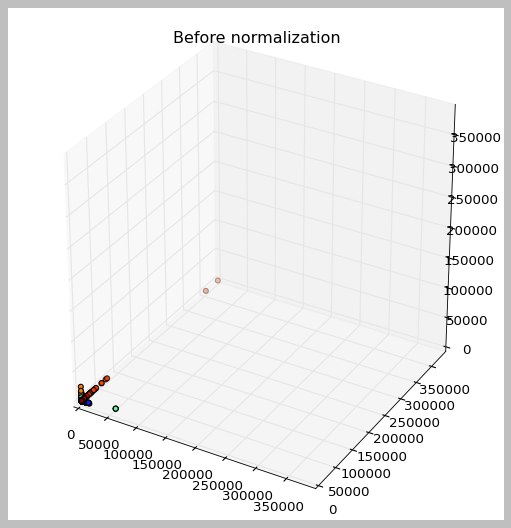

In [76]:
clusters = KMeans.train(data, K, maxIterations=10, runs=10, initializationMode="random")

samples_list = samples.collect()
data_axes = np.array([[point[i] for i in best_indexes] for point in samples_list])
labels = [clusters.predict(point) for point in samples_list]

M = max(data_axes.flatten())

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_axes[:, 0], data_axes[:, 1], data_axes[:, 2], c=labels)
ax.set_xlim(0, M)
ax.set_ylim(0, M)
ax.set_zlim(0, M)
ax.set_title("Before normalization")

<div class="alert alert-success">

Before normalization, a dimension has a very high variance. Because of this, KMeans gives a lot of importance to this dimension, in fact all clusters are placed on that axis.
Looking at the colors we see that most of them are red, this means that they belong to the same label

</div>

/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")
/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


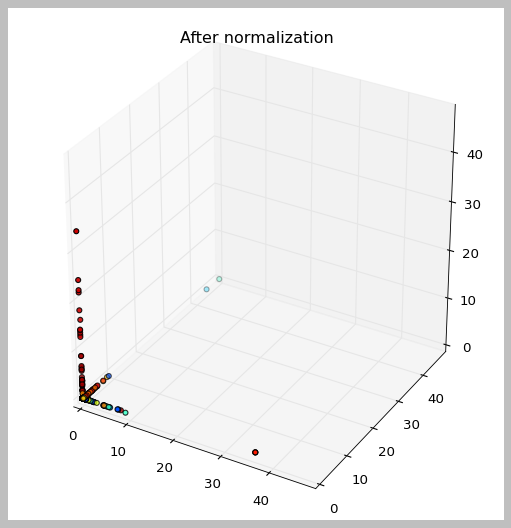

In [80]:
clusters = KMeans.train(normalizedData, K, maxIterations=10, runs=10, initializationMode="random")

samples_normalized = normalizeData(samples).cache().collect()
data_axes = np.array([[point[i] for i in best_indexes] for point in samples_normalized])
labels = [clusters.predict(point) for point in samples_normalized]

M = max(data_axes.flatten())

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_axes[:, 0], data_axes[:, 1], data_axes[:, 2], c=labels)
ax.set_xlim(0, M)
ax.set_ylim(0, M)
ax.set_zlim(0, M)
ax.set_title("After normalization")

<div class="alert alert-success">

After normalization, we see that clusters are spread long all the dimensions and that we see way more colors, which means different labels.
This means that normalizing the metric space allowed us to place the centroids in a better way.
<br>
Also after the normalization we see that data are very polarized along few dimensions.

</div>

## 2.3. Clustering using categorical features

### 2.3.1 Loading data

In the previous section, we ignored the categorical features of our data: this is not a good idea, since these categorical features can be important in providing useful information for clustering.
The problem is that K-means (or at least, the one we have developed and the one we use from MLLib) only work with data points in a metric space. Informally, this means that operations such as addition, subtraction and computing the mean of data points are trivial and well defined. For a more formal definition of what a metric space is, follow this [link](https://en.wikipedia.org/wiki/Metric_space#Definition).

What we will do next is to transform each categorical feature into one or more numerical features. This approach is very widespread: imagine for example you wanted to use K-means to cluster text data. Then, the idea is to transform text data in $d$-dimensional vectors, and a nice way to do it is to use [word2vec](http://deeplearning4j.org/word2vec). If you're interested, follow this link to a nice [blog post](http://bigdatasciencebootcamp.com/posts/Part_3/clustering_news.html) on the problem.

There are two approaches:

* **Approach 1**: mapping **one** categorical feature to **one** numerical feature. The values in each categorical feature are encoded into unique numbers of the new numerical feature. For example, ['VERY HOT','HOT', 'COOL', 'COLD', 'VERY COLD'] will be encoded into [0,1,2,3,4,5]. However, by using this method, we implicit assume that the value of 'VERY HOT' is smaller than 'HOT'... This is not generally true.

* **Approach 2**: mapping **one** categorical feature to **multiple** numerical features. Basically, a single variable with $n$ observations and $d$ distinct values, to $d$ binary variables with $n$ observations each. Each observation indicating the presence (1) or absence (0) of the $d^{th}$ binary variable. For example, ['house', 'car', 'tooth', 'car'] becomes 
```
[
[1,0,0,0],
[0,1,0,0],
[0,0,1,0],
[0,0,0,1],
]
```

We call the second approach "one-hot encoding". By using this approach, we keep the same role for all values of categorical features.



![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

#### Question 10

<div class="alert alert-info">

Calculate the number of distinct categorical features value (at index `1,2,3`). Then construct a new input data using one-hot encoding for these categorical features (don't throw away numerical features!).

</div>

```python
def parseLineWithHotEncoding(line):
    cols = line...
    # label is the last column
    label = ...
    
    vector = cols[0:-1]
    
    # the binary features that are encoded from the first categorical feature
    featureOfCol1 = ...
    # the binary features that are encoded from the second categorical feature
    featureOfCol2 = ...
    # the binary features that are encoded from the third categorical feature
    featureOfCol3 = ...
    
    # construct the new vector
    vector = ([vector[0]] + featureOfCol1 + featureOfCol2 + 
        featureOfCol3 + vector[4:])
    
    # convert each value from string to float
    vector = np.array(...)
    
    return (label, vector)

labelsAndData = raw_data.map(parseLine)

# we only need the data, not the label
data = labelsAndData.values().cache()


normalizedData = normalizeData(data).cache()
```

In [6]:
def normalizeData(data):
    # number of connections
    n = data.count()
   
    means = data.reduce(add) / n
    
    sumSquares = data.map(lambda x: (x - means)**2).reduce(add)
    stdevs = np.sqrt(sumSquares / n)
    
    stdevs[stdevs==0] = 1

    def normalize(point):
        return (point - means) / stdevs
    return data.map(normalize)

In [3]:
featureCol1 = raw_data.map(lambda line: line.split(",")[1]).distinct().collect()
featureCol2 = raw_data.map(lambda line: line.split(",")[2]).distinct().collect()
featureCol3 = raw_data.map(lambda line: line.split(",")[3]).distinct().collect()

In [4]:
print(featureCol1)

['udp', 'tcp', 'icmp']


In [5]:
print(featureCol2)

['whois', 'pop_3', 'harvest', 'uucp_path', 'other', 'systat', 'ecr_i', 'vmnet', 'kshell', 'time', 'Z39_50', 'name', 'http', 'tftp_u', 'netbios_dgm', 'remote_job', 'ftp', 'domain_u', 'discard', 'ldap', 'eco_i', 'finger', 'http_2784', 'private', 'printer', 'sql_net', 'sunrpc', 'nnsp', 'iso_tsap', 'pop_2', 'exec', 'urp_i', 'daytime', 'netbios_ns', 'IRC', 'ftp_data', 'urh_i', 'http_443', 'bgp', 'domain', 'ctf', 'hostnames', 'mtp', 'netstat', 'login', 'klogin', 'nntp', 'ssh', 'imap4', 'aol', 'efs', 'X11', 'csnet_ns', 'rje', 'smtp', 'telnet', 'tim_i', 'shell', 'http_8001', 'supdup', 'red_i', 'pm_dump', 'courier', 'echo', 'ntp_u', 'netbios_ssn', 'uucp', 'gopher', 'auth', 'link']


In [6]:
print(featureCol3)

['SH', 'OTH', 'S1', 'S2', 'REJ', 'RSTOS0', 'RSTO', 'S0', 'RSTR', 'S3', 'SF']


In [7]:
def parseLineWithHotEncoding(line):
    cols = line.split(',')
    # label is the last column
    label = cols[-1]
    
    vector = cols[0:-1]
    
    # the binary features that are encoded from the first categorial feature
    featureOfCol1 = [0]*len(featureCol1)
    featureOfCol1[featureCol1.index(vector[1])] = 1
    # the binary features that are encoded from the second categorial feature
    featureOfCol2 = [0]*len(featureCol2)
    featureOfCol2[featureCol2.index(vector[2])] = 1
    # the binary features that are encoded from the third categorial feature
    featureOfCol3 = [0]*len(featureCol3)
    featureOfCol3[featureCol3.index(vector[3])] = 1
    
    # construct the new vector
    vector = ([vector[0]] + featureOfCol1 + featureOfCol2 + 
        featureOfCol3 + vector[4:])
    
    # convert each value from string to float
    vector = np.array(vector, dtype=np.float)
    
    return (label, vector)

labelsAndData = raw_data.map(parseLineWithHotEncoding)

# we only need the data, not the label
data = labelsAndData.values().cache()

normalizedData = normalizeData(data).cache()

In [32]:
labelsAndData.take(1)

[('normal.', array([  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,

<div class="alert alert-success">

Here we see how the one-hot encoding modified our input data, in fact we have way more columns, and most of them are zero.
<br>
Having more features is good because we can use them to do a better clustering, but now we also have our data which is way bigger than before and this will complicate our job because we will not be able to do some computation locally.
</div>

### 2.3.2. Building models

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

#### Question 11
<div class="alert alert-info">

Using the new data, cluster the connections with different values of $k \in [80,90,100,110,120,130,140,150,160]$.
Evaluate the results and choose the best value of $k$ as previous questions.

</div>

```python
scores = list(...)
plt....
```

In [49]:
def clusters_score(data, k):
        clusters = KMeans.train(data, k, maxIterations=10, runs=10, initializationMode="random")
        wssse = clusters.computeCost(data)
        return wssse

In [59]:
k_runs = [80,90,100,110,120,130,140,150,160]
scores = []
for i in range(10):
    scores.append([clusters_score(normalizedData, k) for k in k_runs])
scores = np.mean(scores,axis=0)

/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


In [60]:
import seaborn as sns
sns.set_style("darkgrid")

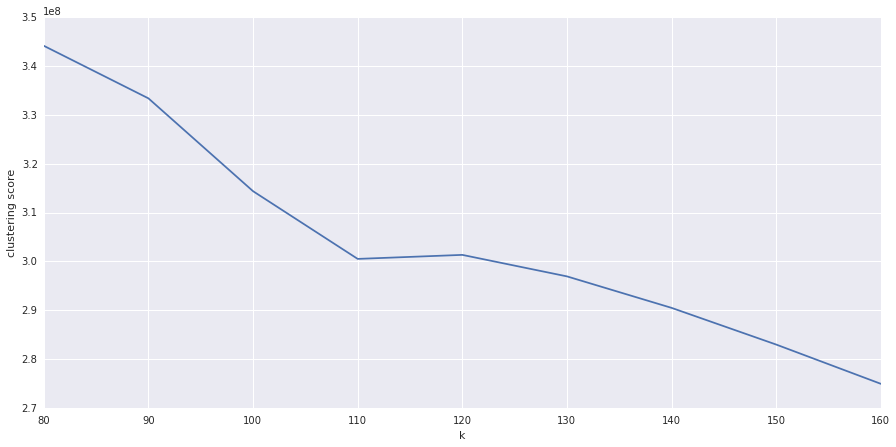

In [61]:
plt.figure(figsize=(15, 7))
plt.xlabel('k')
plt.ylabel('clustering score')
plt.plot(k_runs, scores)
plt.show()

<div class="alert alert-success">
Here we calculated the score with different k ten times and then we calculated the mean. 
We see that the score is even higher than before, but we think this is due to the fact that we added the categorical features.

Anyway, we see that the score decreases until it reaches a plateau from 110 and 120, then in decreases again but at a slower rate. Now we think that the correct number of cluster is either 110 or 160.
https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set
</div>

### kmeans||

In [44]:
def clusters_score(data, k):
        clusters = KMeans.train(data, k, maxIterations=10, runs=10, initializationMode="k-means||")
        wssse = clusters.computeCost(data)
        return wssse

In [45]:
k_runs = [80,90,100,110,120,130,140,150,160]

scores = [clusters_score(normalizedData, k) for k in k_runs]


/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


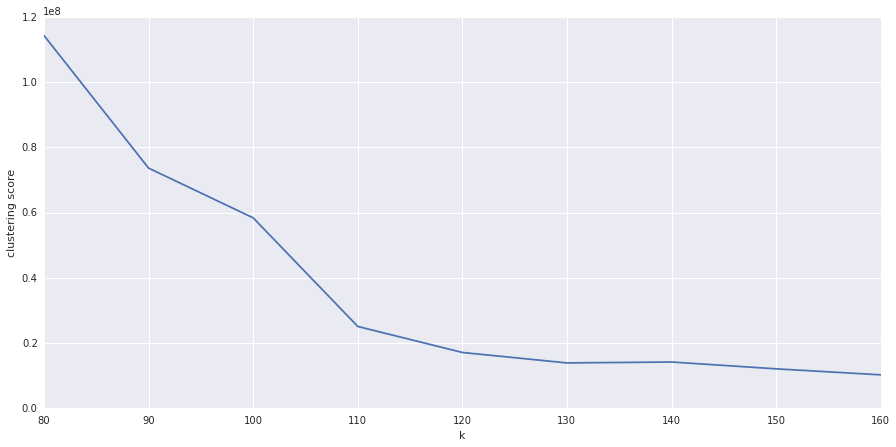

In [46]:
plt.figure(figsize=(15, 7))
plt.xlabel('k')
plt.ylabel('clustering score')
plt.plot(k_runs, scores)
plt.show()

<div class="alert alert-success">
After adding the new features, we can say that the lowest score is obtained with 160 clusters. We note an elbow at 110-120 clusters, so we can either choose 110 or 160. The point here is if we want to have a more general model or a model more specific, in fact if we want to do fraud detection, especially in this field, we think that we should divide our data in many different clusters, in this way we can isolate in a better way the malicious connections.
</div>

## 2.4. Anomaly detection
When we have a new connection data (e.g., one that we never saw before), we simply find the closest cluster for it, and use this information as a proxy to indicate whether the data point is anomalous or not. A simple approach to decide when there is an anomaly or not, amounts to measuring the new data point’s distance to its nearest centroid. If this distance exceeds some thresholds, it is anomalous.

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

#### Question 12
<div class="alert alert-info">

Build your model with the best value of $k$ in your opinion. Then, detect the anomalous connections in our data. Plot and discuss your result.

</div>

<div class="label label-success">HINT</div> The threshold has strong impact on the result. Be careful when choosing it! A simple way to choose the threshold's value is picking up a distance of a data point from among known data. For example, the 100th-farthest data point distance can be an option.

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

In [31]:
import seaborn as sns
sns.set_style("darkgrid")

In [32]:
def euclidean_distance_1(a, b):
    c = a-b
    return np.sqrt((a-b).T.dot(a-b))

In [33]:
def error(clusters, point):
    closest_center = clusters.centers[clusters.predict(point)]
    return euclidean_distance_1(closest_center, point)

In [34]:
clusters = KMeans.train(normalizedData, 160, maxIterations=10, runs=10, initializationMode="random")

anomalous = normalizedData.map(lambda point: (point, error(clusters, point))).takeOrdered(1000, lambda key: -key[1])


/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


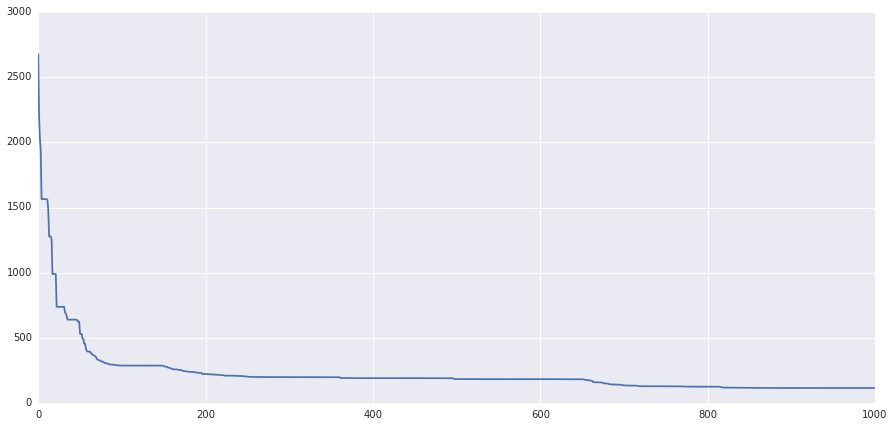

In [35]:
plt.figure(figsize=(15, 7))
plt.plot([anomaly[1] for anomaly in anomalous])
plt.show()

<div class="alert alert-success">
Plotting the 1000th farthest point we see a plateau in correspondence of the 100th point.
</div>

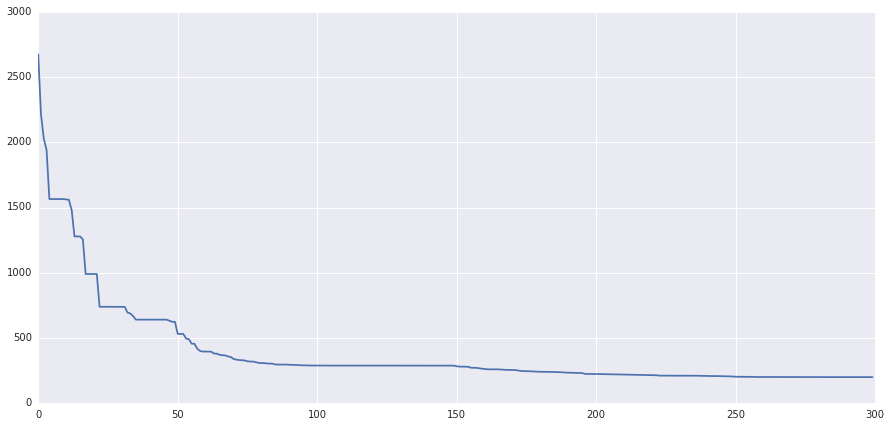

In [36]:
plt.figure(figsize=(15, 7))
plt.plot([anomaly[1] for anomaly in anomalous[:300]])
plt.show()

In [41]:
anomalous[45][1]

638.77659806444069

In [39]:
anomalous[100][1]

285.86066245334155

<div class="alert alert-success">
Looking more closely, we see that we can pick the plateau in correspondence of the 45th or the 100th point
</div>

<div class="alert alert-success">
Clearly, points that are very distant from their centroids are anomalies. The main problem is that we have too few of them, in fact there are attacks where there are millions of connections. In this optic, we think that with this technique we can catch those malicious connections that are present in a very limited number.
</div>

# todo: check labels of anomalies

#### Question 13
<div class="alert alert-info">

Try other methods to find the best value for $k$ such as `silhouette`, `entropy`... In particular, with this data, you can take advantage of predefined labels to calculate the quality of model using entropy... However, we suggest you to try with `silhouette`. It's more general and can work with any dataset (with and without predefined labels).

</div>

Here are some additional information about the metrics we suggest to use:
- [Silhouette](https://en.wikipedia.org/wiki/Silhouette_(clustering))
- [Hack approach to Silhouette](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Entropy](http://scikit-learn.org/stable/modules/clustering.html) [Lookup for entropy]

<div class="label label-danger">Note</div> you are free to play with any relevant evaluation metric you think appropriate for your work!

<div class="alert alert-success">
We have seen that there are scalability problems, in fact the one-hot line encoding allows us to use categorical features but it also increases the size of the rdd. This basically means that we can't perform heavy operations locally, but we need to make them using spark.

Now, the problem is that the silhouette is quadratic with the number of points.
<br>
<br>
Here we decided to abandon the plain old silhouette calculation because it required too much time. Instead, we calculated the silhouette using the distance of the point from its centroid and the distance with the second nearest centroid. In this way, the complexity of the calculation dramatically decreased, now is O(number_points * number_centroids).
<br>
<br>
An alternative is to do random sampling: in another situation we would have done that, but here we are treating data where most of the data is homogeneous, while there are few interesting points that we want to cluster well. Some of this points represent some attacks where we have few connections. In this case, if we sample we remove most of the interesting informations that we have, which makes the whole process unuseful.

</div>

In [41]:
from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from time import time

def plot_silhouette(k,initializationMode='random'):

    def euclidean_distance(a, b):
        c = a - b
        return np.sqrt(c.T.dot(c))

    def find_closest_centroid(datapoint, centroids):
        return min(enumerate(centroids), key=lambda x: euclidean_distance(datapoint, x[1]))[0]

        # https://en.wikipedia.org/wiki/Silhouette_(clustering)
    def calculate_silhouette(datapoint,centroids):
        #find closest centroids
        distances = [(euclidean_distance(datapoint, x[1]),x[0]) for x in enumerate(centroids)]
        minimum = min(distances,key=lambda x: x[0])
        distances.pop(minimum[1])
        minimum_2 = min(distances,key=lambda x: x[0])
        return (minimum[1],(1 - minimum[0]/minimum_2[0]))
    
    clusters = KMeans.train(normalizedData, k, maxIterations=10, runs=10, initializationMode=initializationMode)
    centroids = np.array([x for x in clusters.centers])
    bCentroids = sc.broadcast(centroids)
    t0 = time()
    tmp = normalizedData.map(lambda point: calculate_silhouette(point, bCentroids.value))
    silhouette_avg = tmp.map(lambda x: x[1]).mean()
    silhouette = tmp.groupByKey().mapValues(list).collectAsMap()
    t1 = time()
    print(str(t1-t0) + ' seconds')
    print("number of clusters: %d" % len(silhouette))
    
    # http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(18, 30)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    y_lower = 10
    for i in sorted(silhouette):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = silhouette[i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = len(silhouette[i])
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / len(silhouette))
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

<div class="alert alert-success">
In order to decide if a plot is ok or not, we use the silhouette average, which is the red line that we plot. An high avg silhouette means that the clusters are well formed.
<br>
Since we have homogenous big clusters, the avg value is very high and we need to look at the position of each cluster silhouette, in fact if we have clusters that contains very different values or clusters under the average, it means that there are some problems with that cluster.
</div>

/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


145.5440628528595 seconds
number of clusters: 38


/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


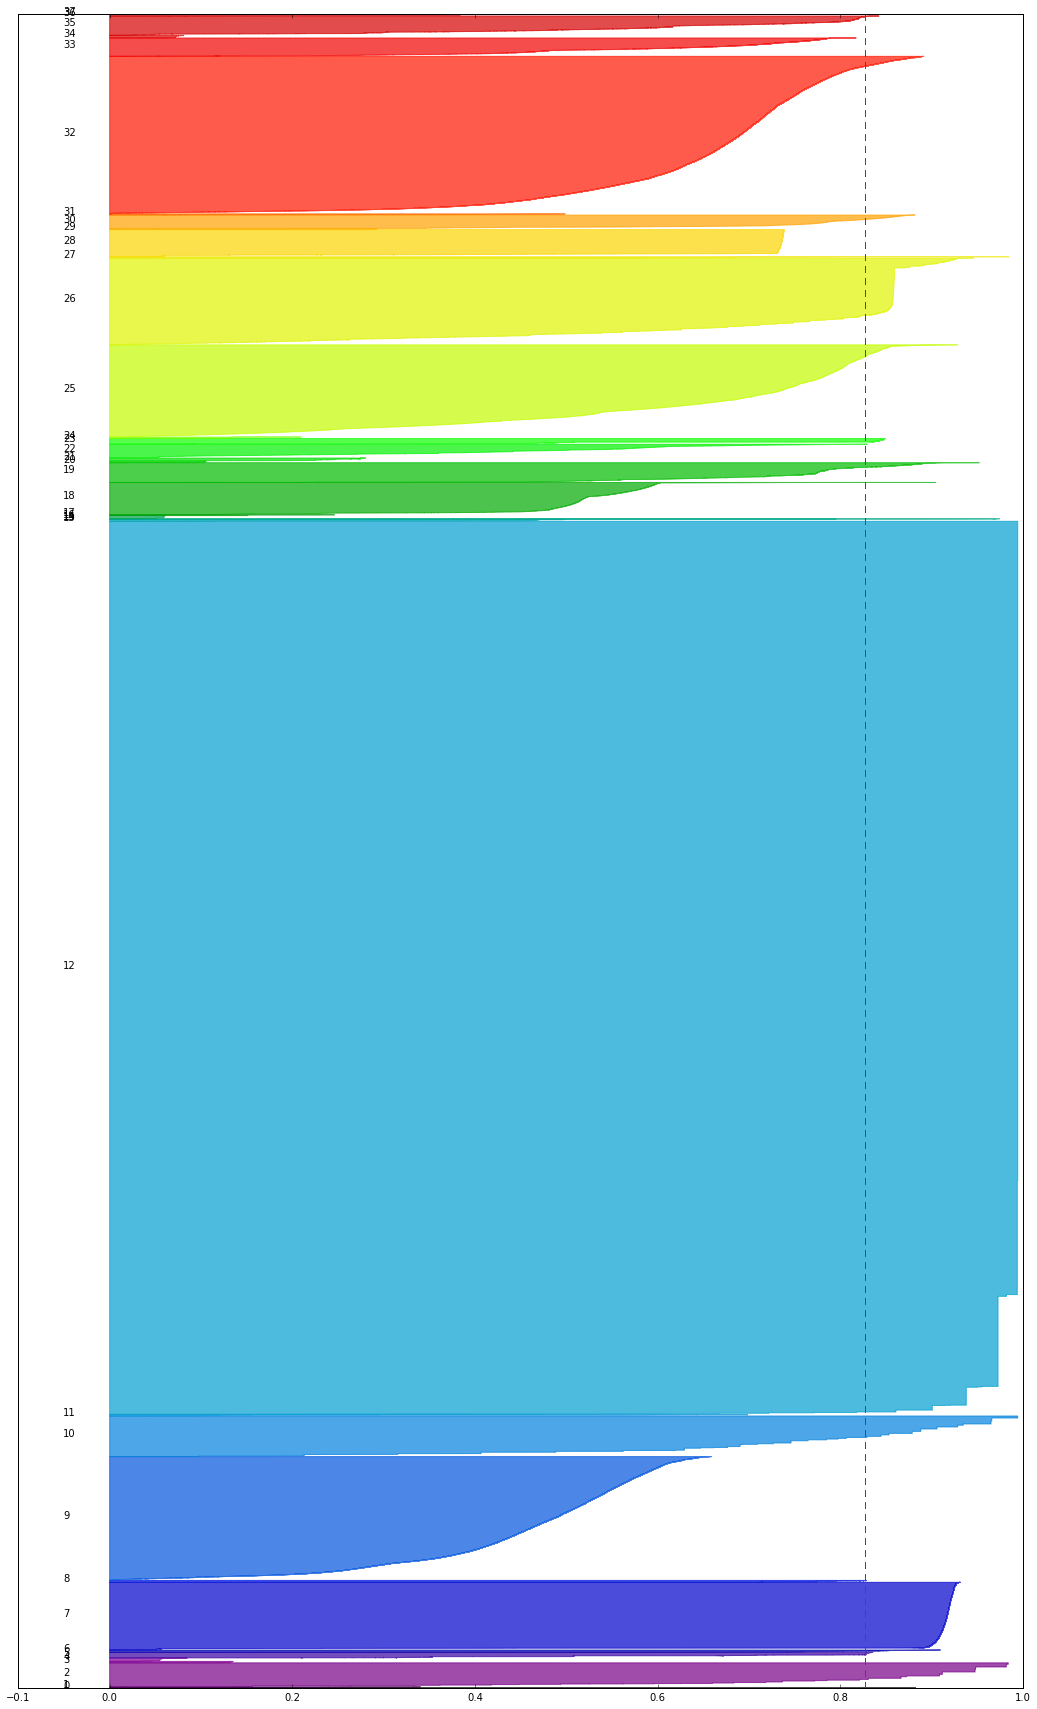

In [34]:
plot_silhouette(100)

<div class="alert alert-success">
This one is definitely bad, there is a cluster (number 9) which is completely under the avg silhouette and cluster 6 should be splitted in two.
</div>

/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


205.71993923187256 seconds
number of clusters: 59


/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


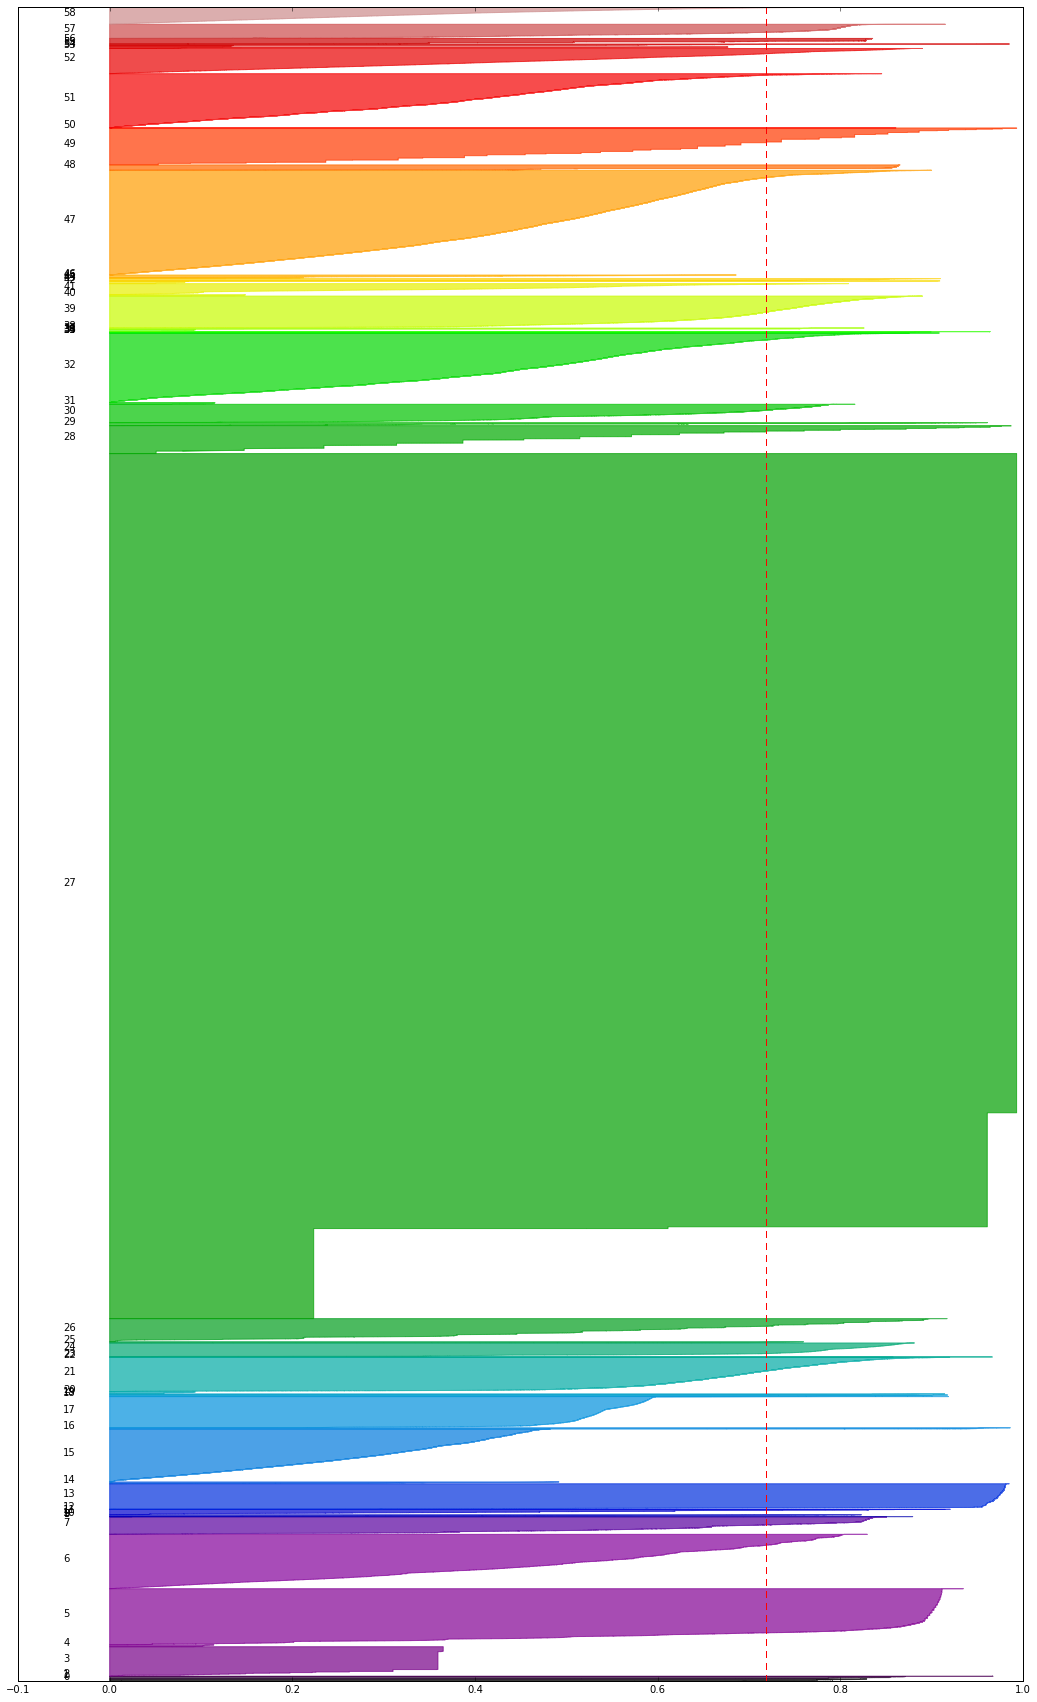

In [36]:
plot_silhouette(120)

<div class="alert alert-success">
Here we have the main cluster which contains points that are very different among them. So we can state that clusters are not optimal.
</div>

/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


261.5782070159912 seconds
number of clusters: 72


/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


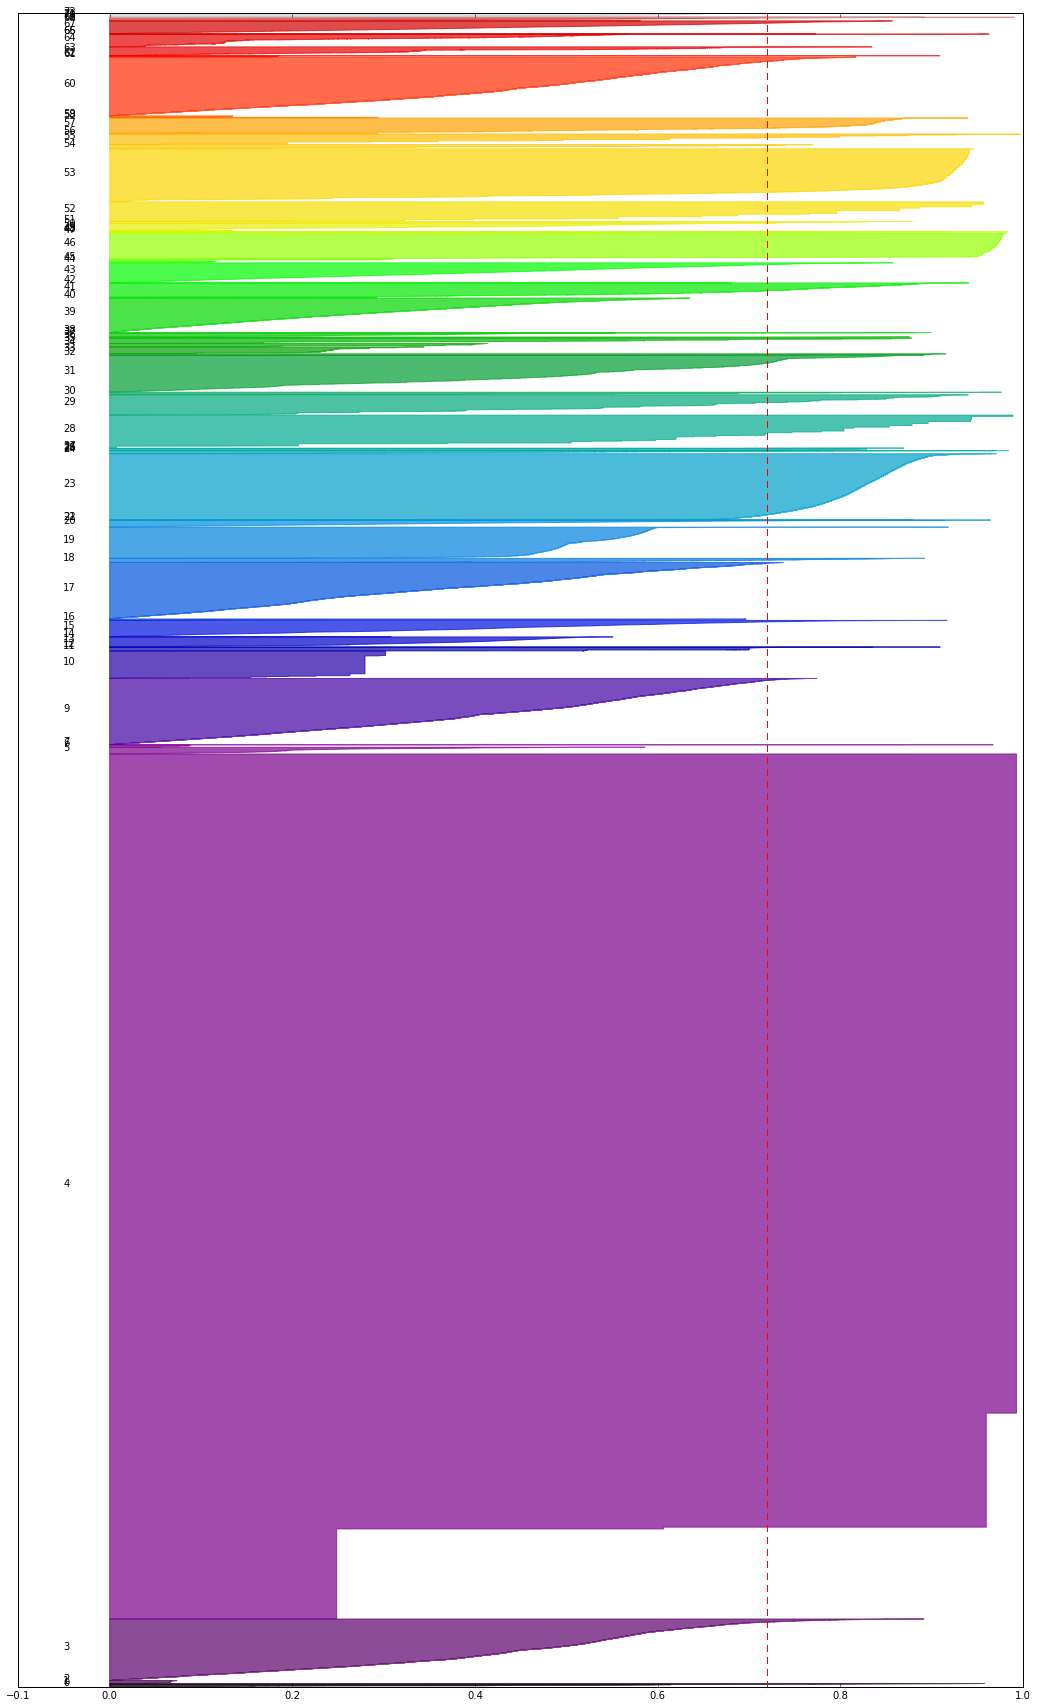

In [40]:
plot_silhouette(160)

<div class="alert alert-success">
Now we start seeing many different clusters, which are representative of the points that contains.
We have a problem with cluster number 4, which is not homogeneous and could be splitted in two.
Actually, this is true for other clusters too, but we think that this is due to the random position of centroids.
</div>

### final consideration

<div class="alert alert-success">
From the spectral distribution of the silhouette, we can state a few things:
<br>
1) the number of clusters is way different from what we expected to see, this means that during the process there are some empty clusters that are not relocated.
<br>
2) most of the points end up in a big cluster, this is because most of the connections, labeled as 'smurf', have exactly the same values (we have seen this before) and they finish in few big clusters.
<br>
3)Remember that the kmeans is random, so we may obtain completely different silhouettes after a second run.
</div>

## kmeans||

<div class="alert alert-success">
Before we saw that with the kmeans|| we can obtain better results. Let's see if this is confirmed by the silhouette.
</div>

/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


315.7069580554962 seconds
number of clusters: 100


/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


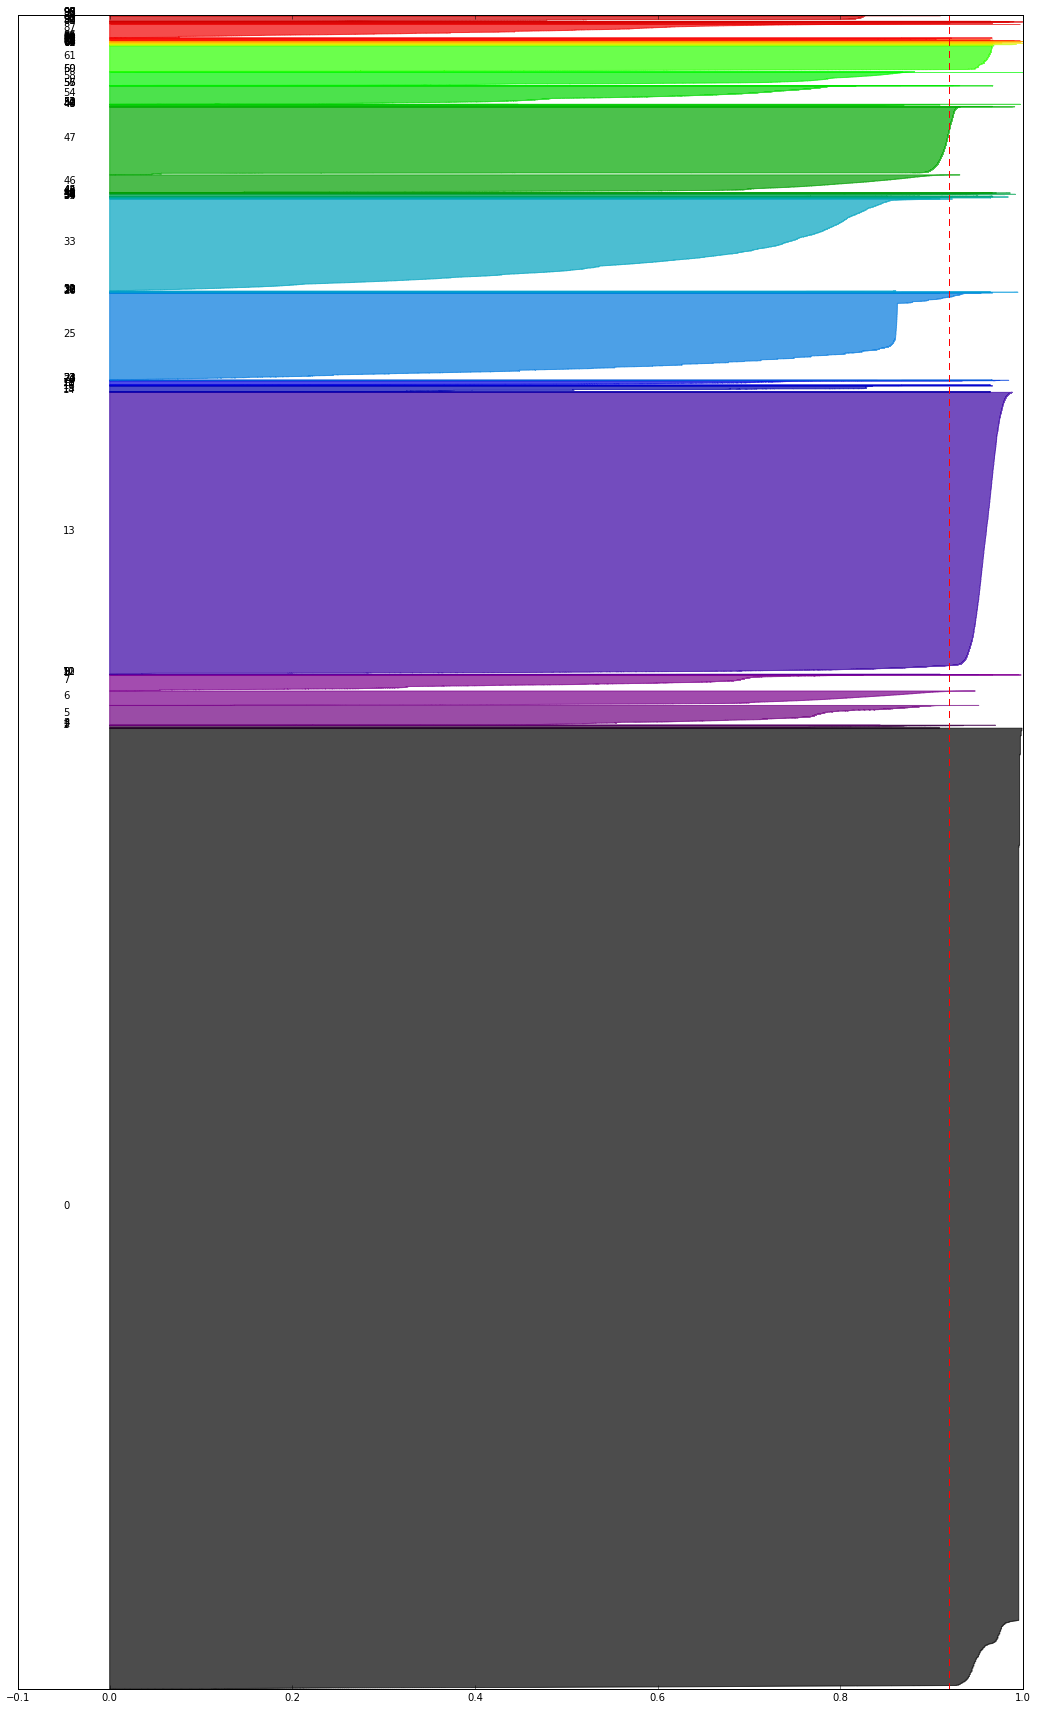

In [42]:
plot_silhouette(100,"k-means||")

<div class="alert alert-success">
Respect to the random kmeans here we have way better results: clusters contains points with similar features.
</div>

/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


378.42458963394165 seconds
number of clusters: 120


/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


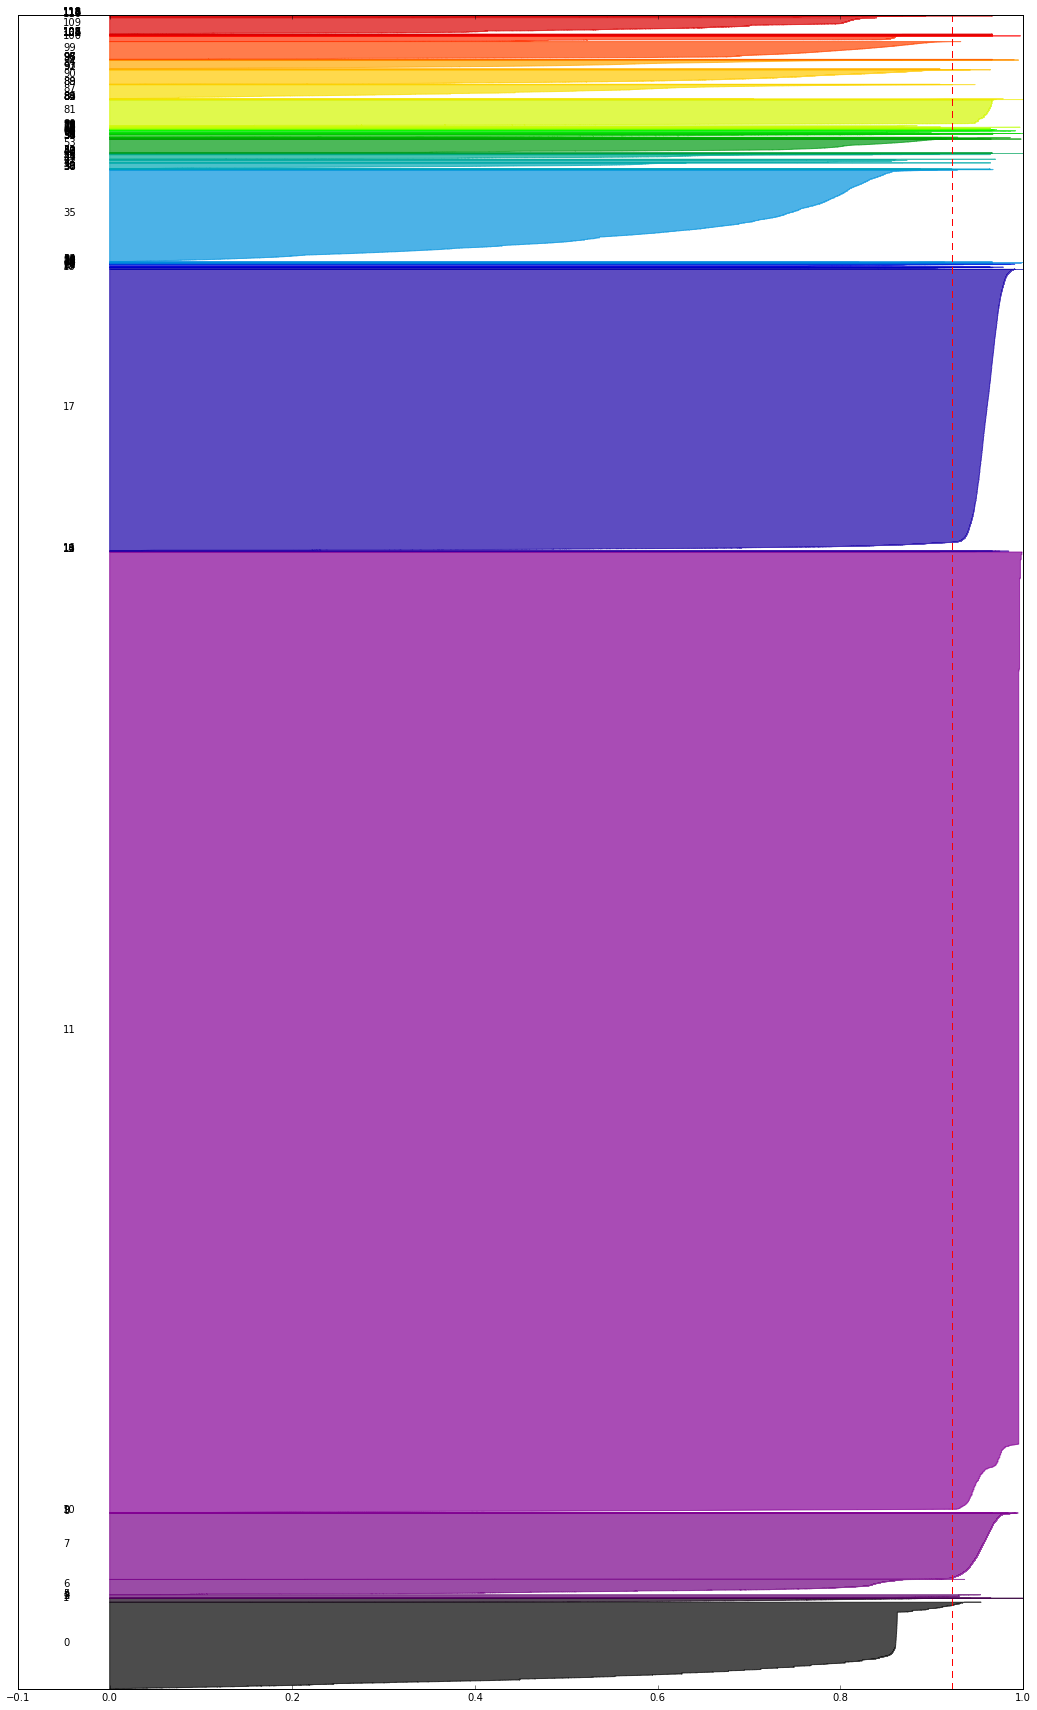

In [44]:
plot_silhouette(120,"k-means||")

<div class="alert alert-success">
This is actually similar to what we saw with 100 clusters.
</div>

/opt/spark/python/pyspark/mllib/clustering.py:347: UserWarning: The param `runs` has no effect since Spark 2.0.0.
  warnings.warn("The param `runs` has no effect since Spark 2.0.0.")


496.8095965385437 seconds
number of clusters: 160


/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


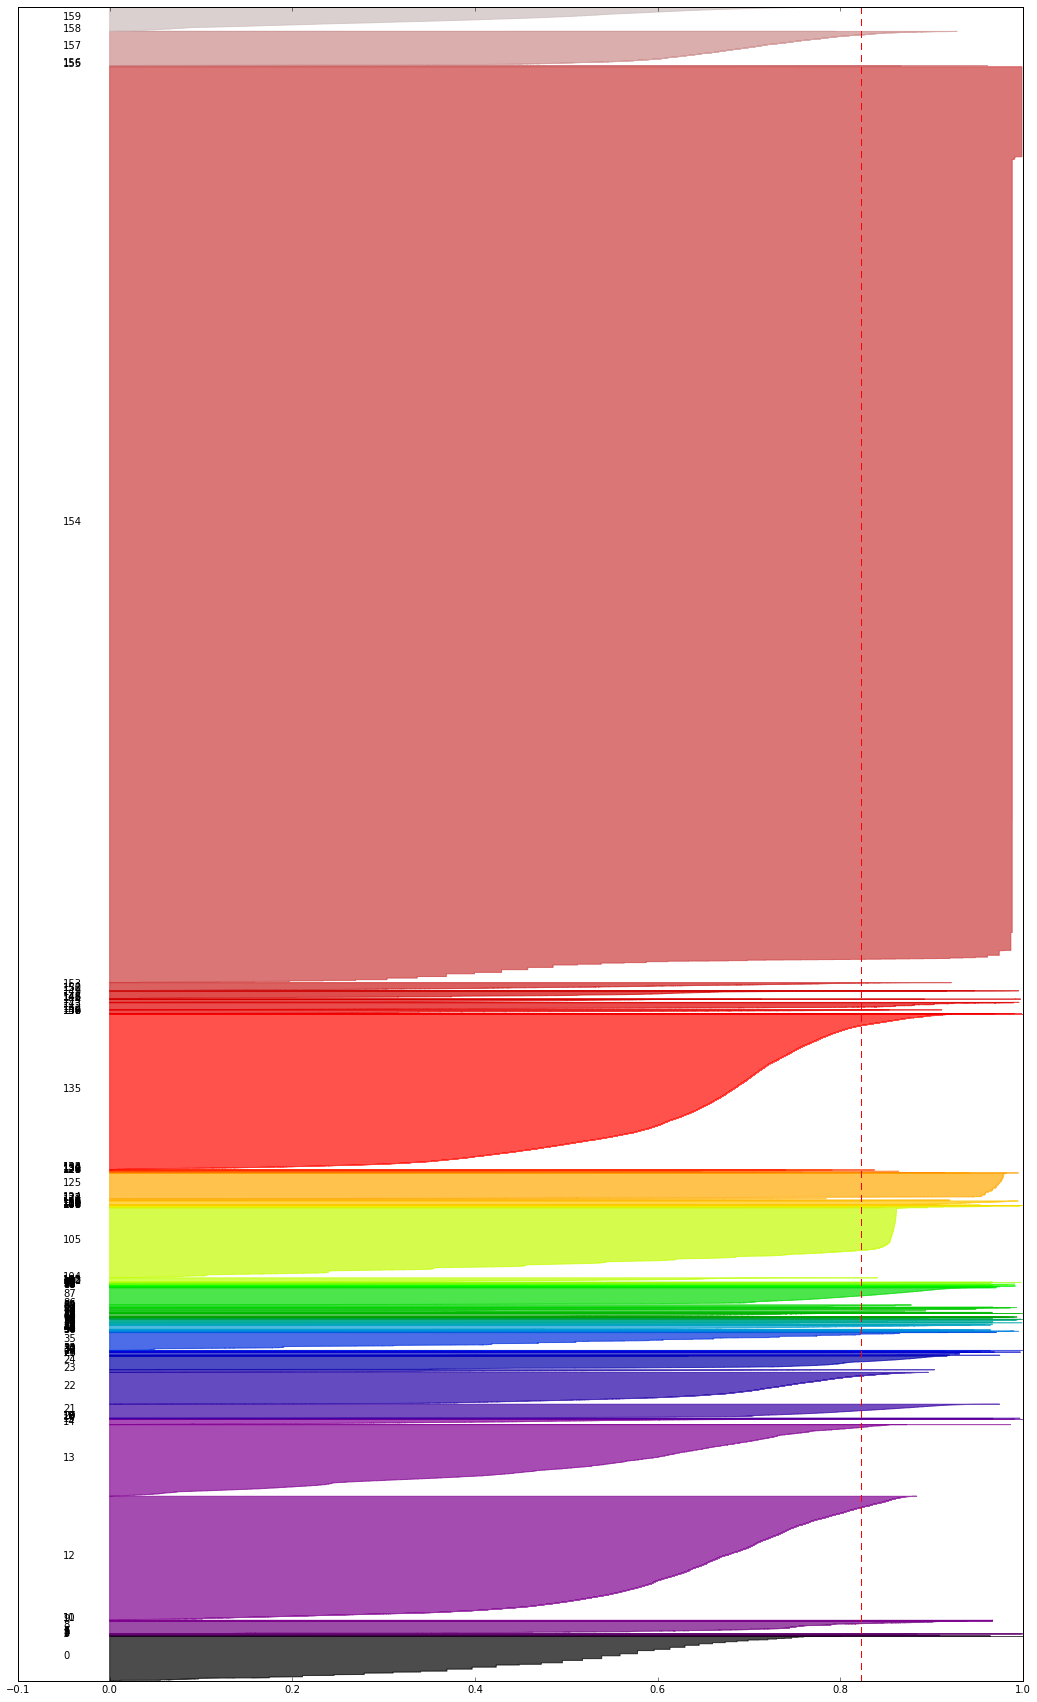

In [48]:
plot_silhouette(160,"k-means||")

<div class="alert alert-success">
Here we see that clusters are not well formed, this is confirmed by the low avg silhouette and also visually by the clusters with points with many different values.
</div>

<div class="alert alert-success">
From the silhouette analysis we have seen that the best number of clusters is around 120, in this way we obtain very homogeneous clusters and a very high avg silhouette.
</div>

# entropy

<div class="alert alert-info">
In order to calculate the entropy we need to attach each label to the normalized point
</div>

In [63]:
from time import time
import os
import sys
import re
from pyspark import SparkContext
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
#from pyspark.sql.functions import *
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyspark.sql.functions as func
import matplotlib.patches as mpatches
from pyspark.mllib.clustering import KMeans, KMeansModel
from operator import add

from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint
import itertools
input_path = "/datasets/k-means/kddcup.data"
raw_data = sc.textFile(input_path, 12)

In [64]:
featureCol1 = raw_data.map(lambda line: line.split(",")[1]).distinct().collect()
featureCol2 = raw_data.map(lambda line: line.split(",")[2]).distinct().collect()
featureCol3 = raw_data.map(lambda line: line.split(",")[3]).distinct().collect()

In [65]:
def normalizeData_labels(data):
    # number of connections
    data_val = data.values()
    n = data_val.count()
   
    means = data_val.reduce(add) / n
    
    sumSquares = data_val.map(lambda x: (x - means)**2).reduce(add)
    stdevs = np.sqrt(sumSquares / n)
    
    stdevs[stdevs==0] = 1

    def normalize(point):
        return (point - means) / stdevs
    return data.mapValues(normalize)

In [66]:
def normalizeData(data):
    # number of connections
    n = data.count()
   
    means = data.reduce(add) / n
    
    sumSquares = data.map(lambda x: (x - means)**2).reduce(add)
    stdevs = np.sqrt(sumSquares / n)
    
    stdevs[stdevs==0] = 1

    def normalize(point):
        return (point - means) / stdevs
    return data.map(normalize)

In [67]:
def parseLineWithHotEncoding(line):
    cols = line.split(',')
    # label is the last column
    label = cols[-1]
    
    vector = cols[0:-1]
    
    # the binary features that are encoded from the first categorial feature
    featureOfCol1 = [0]*len(featureCol1)
    featureOfCol1[featureCol1.index(vector[1])] = 1
    # the binary features that are encoded from the second categorial feature
    featureOfCol2 = [0]*len(featureCol2)
    featureOfCol2[featureCol2.index(vector[2])] = 1
    # the binary features that are encoded from the third categorial feature
    featureOfCol3 = [0]*len(featureCol3)
    featureOfCol3[featureCol3.index(vector[3])] = 1
    
    # construct the new vector
    vector = ([vector[0]] + featureOfCol1 + featureOfCol2 + 
        featureOfCol3 + vector[4:])
    
    # convert each value from string to float
    vector = np.array(vector, dtype=np.float)
    
    return (label, vector)

labelsAndData = raw_data.map(parseLineWithHotEncoding)
data = labelsAndData.values()
normalizedData = normalizeData(data).cache()
normalizedData_labels = normalizeData_labels(labelsAndData).cache()

In [68]:
#http://stackoverflow.com/questions/35709562/how-to-calculate-clustering-entropy-a-working-example-or-software-code

import math
def calculate_H(count, n_points):
    p = count/n_points
    return -p*np.log2(p)

def entropy_spark(labels_data, clusters,weights=True):
    bClusters = sc.broadcast(clusters)
    labels_clusters_count = labels_data.map(lambda x: ((x[0], bClusters.value.predict(x[1])),1) ).reduceByKey(add).cache()
    # (label, cluster), count
    
    # Now we need to know how much points there is in each clusters:
    clustersCount = labels_clusters_count.map(lambda x: (x[0][1], x[1])).reduceByKey(add).collect()
    cluster_count_dict = {key: value for key, value in clustersCount}
    bcluster_count_dict = sc.broadcast(cluster_count_dict)
    
    # We compute the entropy generated by each label
    partialEntropy = labels_clusters_count.map(lambda x: (x[0][1], calculate_H(x[1], bcluster_count_dict.value[x[0][1]])))
    #cluster,entropy
    
    clustersEntropy = partialEntropy.reduceByKey(add)
    #cluster,entropy
    
    #now we have all H for each cluster
    
    
    if weights:
        rdd1 = clustersEntropy.map(lambda x: np.array((x[1]*bcluster_count_dict.value[x[0]], bcluster_count_dict.value[x[0]])))
        #weighted entropy, number of points in cluster
        scores_nbPoints = rdd1.reduce(add)
        result = scores_nbPoints[0]/scores_nbPoints[1]
    else:
        result = clustersEntropy.values().mean()
    
    labels_clusters_count.unpersist()
    return result

### random kmeans

In [ ]:
clusters = KMeans.train(normalizedData, 120, maxIterations=10, initializationMode="random")

In [17]:
entropy_spark(normalizedData_labels, clusters)

0.035407720016539967

In [ ]:
clusters = KMeans.train(normalizedData, 160, maxIterations=10, initializationMode="random")

In [19]:
entropy_spark(normalizedData_labels, clusters)

0.034424818776465319

<div class="alert alert-success">
Here we see that we obtain a very low value for the entropy, this is because in the definition of entropy clusters are weighted, and in our case this is bad because we have one big cluster with a really low entropy. As expected, when we use more clusters, we obtain a better score.

</div>

In [21]:
clusters = KMeans.train(normalizedData, 120, maxIterations=10, initializationMode="random")
entropy_spark(normalizedData_labels, clusters, weights=False)

0.23256687708802376

In [22]:
clusters = KMeans.train(normalizedData, 160, maxIterations=10, initializationMode="random")
entropy_spark(normalizedData_labels, clusters, weights=False)

0.20864434027872142

<div class="alert alert-success">
As expected, we obtain higher results, in fact now all clusters counts the same. We still see that more clusters allow us to lower the entropy.
</div>

### kmeans||

In [27]:
results = []

In [28]:
clusters = KMeans.train(normalizedData, 80, maxIterations=10, initializationMode="k-means||")
results.append(entropy_spark(normalizedData_labels, clusters, weights=False))

In [29]:
clusters = KMeans.train(normalizedData, 120, maxIterations=10, initializationMode="k-means||")
results.append(entropy_spark(normalizedData_labels, clusters, weights=False))

In [30]:
clusters = KMeans.train(normalizedData, 160, maxIterations=10, initializationMode="k-means||")
results.append(entropy_spark(normalizedData_labels, clusters, weights=False))

In [33]:
import seaborn as sns
sns.set_style("darkgrid")

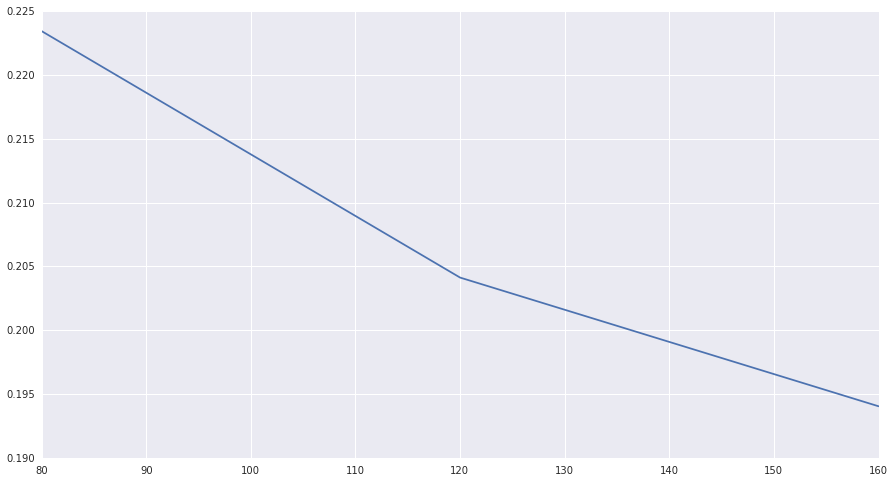

In [34]:
plt.figure(figsize=(15,8))
plt.plot([80,120,160], results)
plt.show()

<div class="alert alert-success">
Here we can see that the entropy score decreases when we use a higher number of clusters. We can also see that after 120 clusters, the entropy still decreases, but at a lower rate. This means that we are reaching a limit of goodness of our clusters.
</div>

<div class="alert alert-success">
When we compare the entropy results of the kmeans|| and the random kmeans, we see that they are actually very similar, but the kmeans|| results are better. This confirms what we saw visually from the silhouette analysis: the kmeans|| is able to cluster in a better way our data.
</div>

### Conclusions

<div class="alert alert-success">
We did all the work related to clustering using both the random kmeans and the kmeans|| algorithm. We did this because the default algorithm used by spark is the kmeans||, so we thought that they must have good reasons to use a more complex algorithm.
<br>
We discovered that the random kmeans is definetly unstable, in fact it returns every time different clusters with different scores. There is more, most of the times it returns a lower number of clusters than required, this affects badly our statistics and we think that this is the worst thing of the random kmeans.
<br>
Instead, we have seen that the kmeans|| is stable, in fact it uses a smart initial centroids positioning, and scores better than the random kmeans. We have see this using the silhouette and the entropy score.
The silhouette allow us to judge the shape of a cluster looking at how points are positioned respect its center and the nearest external centroid, In this way we can visually see how the final clusters are made.
The entropy uses the labels, this is essential to finally check the goodness of our clusters, and we have actually seen that we obtain a low entropy, which means that we can cluster in a good way our connections.
</div>

#### Question 14
<div class="alert alert-info">

Implement K-means on Spark so that It can work with large datasets in parallel. Test your algorithm with our dataset in this notebook. Compare our algorithm with the algorithm from MLLIB.  

<ul></ul>

Let's clarify the meaning of this question: what we want is for students to design the K-means algorithm for the parallel programming model exposed by Spark. You are strongly invited to use the Python API (pyspark). So, at the end of the day, you will operate on RDDs, and implement a `map/reduce` algorithm that performs the two phases of the standard K-means algorithm, i.e. the assignment step and the update step.

</div>

In [2]:
def normalizeData(data):
    # number of connections
    n = data.count()
   
    means = data.reduce(add) / n
    
    sumSquares = data.map(lambda x: (x - means)**2).reduce(add)
    stdevs = np.sqrt(sumSquares / n)
    
    stdevs[stdevs==0] = 1

    def normalize(point):
        return (point - means) / stdevs
    return data.map(normalize)

In [3]:
featureCol1 = raw_data.map(lambda line: line.split(",")[1]).distinct().collect()
featureCol2 = raw_data.map(lambda line: line.split(",")[2]).distinct().collect()
featureCol3 = raw_data.map(lambda line: line.split(",")[3]).distinct().collect()

In [4]:
def parseLineWithHotEncoding(line):
    cols = line.split(',')
    # label is the last column
    label = cols[-1]
    
    vector = cols[0:-1]
    
    # the binary features that are encoded from the first categorial feature
    featureOfCol1 = [0]*len(featureCol1)
    featureOfCol1[featureCol1.index(vector[1])] = 1
    # the binary features that are encoded from the second categorial feature
    featureOfCol2 = [0]*len(featureCol2)
    featureOfCol2[featureCol2.index(vector[2])] = 1
    # the binary features that are encoded from the third categorial feature
    featureOfCol3 = [0]*len(featureCol3)
    featureOfCol3[featureCol3.index(vector[3])] = 1
    
    # construct the new vector
    vector = ([vector[0]] + featureOfCol1 + featureOfCol2 + 
        featureOfCol3 + vector[4:])
    
    # convert each value from string to float
    vector = np.array(vector, dtype=np.float)
    
    return (label, vector)

labelsAndData = raw_data.map(parseLineWithHotEncoding)

# we only need the data, not the label
data = labelsAndData.values().cache()

normalizedData = normalizeData(data).cache()

In [5]:
from __future__ import print_function

import sys

import numpy as np
from pyspark.sql import SparkSession

def closest_point(p, centers):
    bestIndex = 0
    closest = float("+inf")
    for i in range(len(centers)):
        c = p - centers[i]
        tempDist = c.T.dot(c)
        if tempDist < closest:
            closest = tempDist
            bestIndex = i
    return bestIndex

In [6]:
def closest_point_squared(p, centers):
    bestIndex = 0
    closest = float("+inf")
    for i in range(len(centers)):
        c = p - centers[i]
        tempDist = c.T.dot(c)
        if tempDist < closest:
            closest = tempDist
            bestIndex = i
    return closest

In [7]:
def squared_euclidean_distance(a, b):
    c = a-b
    return c.T.dot(c)

In [8]:
from operator import add


In [27]:
def KMeansTrain(data, K=2, maxIterations=3):
    t0 = time()
    centroids = data.takeSample(False, K)
    
    epsilon = float("+inf")
    converge_epsilon = 0.0001
    iteration = 0
    while iteration < maxIterations and epsilon > converge_epsilon:
        bcentroids = sc.broadcast(centroids)
        closest = data.map(lambda p: (closest_point(p, bcentroids.value), (p, 1)))
        #cluster,point,1
        
        pointStats = closest.reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1]))
        
        #closest,sum,count
        new_centroids = pointStats.map(lambda x: (x[0], x[1][0] / x[1][1])).collect()
        #closest,mean
        bcentroids.unpersist()
        epsilon = np.sqrt(sum(squared_euclidean_distance(centroids[i],p) for (i, p) in new_centroids))

        for (i, p) in new_centroids:
            centroids[i] = p
        
        
        iteration += 1

    wssse = data.map(lambda p: (closest_point_squared(p, centroids))).reduce(add)
    print("wssse: %.2f " % wssse)
    t1 = time()
    print("time: %.2f" % float(t1-t0))
    #print("Final centers: " + str(kPoints))
    return centroids


In [28]:
centroids = KMeansTrain(normalizedData, K=2, maxIterations=10)

WSSSE: 540311338.62 
time: 60.48


In [29]:
centroids = KMeansTrain(normalizedData, K=5, maxIterations=10)

WSSSE: 501843728.32 
time: 133.92


In [30]:
centroids = KMeansTrain(normalizedData, K=10, maxIterations=10)

WSSSE: 449151045.13 
time: 191.15


In [22]:
t0 = time()
clusters = KMeans.train(normalizedData, 2, maxIterations=10, initializationMode="random")
wssse = clusters.computeCost(normalizedData)
t1 = time()
print("wssse: %.2f " % wssse)
print("time: %.2f" % float(t1-t0))

WSSSE: 536499574.87 
time: 13.98


In [21]:
t0 = time()
clusters = KMeans.train(normalizedData, 5, maxIterations=10, initializationMode="random")
wssse = clusters.computeCost(normalizedData)
t1 = time()
print("wssse: %.2f " % wssse)
print("time: %.2f" % float(t1-t0))

WSSSE: 540311338.97 
time: 14.34


<div class="alert alert-success">
Here we implemented the kmeans as a map reduce algorithm, using plain spark functions.
Description:
In the beginning, we take some random samples as initial centroids. The centroids are never broadcasted because they are update every time.
Then, we map each point to its nearest centroid.
At this point, using a reducebykey, we sum all the points inside a cluster and we count them.
Finally, we can calculate easily the position of the new centroids.
The calculation of the distance with the old centroids is done locally and then we iterate again.


Here we optimized the euclidean distance by not taking the radix
</div>

<div class="alert alert-success">
We have seen that most of the time is spent in the computation of the distance.
Looking at the scala implementation of the mllib kmeans we have seen that the distance is calculated with the function 'fastSquaredDistance' from mllib utils, we think that this is the main reason why our approach is slower.

In addition, we have seen that in the scala implementation they use accumulators to speedup the reduce phase.
</div>

# bisecting k-means

<div class="alert alert-success">
Until now we used the standard kmeans and the spark kmeans||.
Now we would like to use other clustering algorithms such as the bisecting kmeans, maybe we can obtain better results.
</div>

In [42]:
from numpy import array

from pyspark.mllib.clustering import BisectingKMeans, BisectingKMeansModel

In [45]:
def euclidean_distance(a, b):
        c = a - b
        return np.sqrt(c.T.dot(c))

def find_closest_centroid(datapoint, centroids):
    return min(enumerate(centroids), key=lambda x: euclidean_distance(datapoint, x[1]))[0]

    # https://en.wikipedia.org/wiki/Silhouette_(clustering)
def calculate_silhouette(datapoint,centroids):
    #find closest centroids
    distances = [(euclidean_distance(datapoint, x[1]),x[0]) for x in enumerate(centroids)]
    minimum = min(distances,key=lambda x: x[0])
    distances.pop(minimum[1])
    minimum_2 = min(distances,key=lambda x: x[0])
    return (minimum[1],(1 - minimum[0]/minimum_2[0]))

In [72]:
clusters = BisectingKMeans.train(normalizedData, k=160, maxIterations=10)

In [46]:
centroids = np.array([x for x in clusters.centers])
bCentroids = sc.broadcast(centroids)
tmp = normalizedData.map(lambda point: calculate_silhouette(point, bCentroids.value))
silhouette_avg = tmp.map(lambda x: x[1]).mean()
silhouette = tmp.groupByKey().mapValues(list).collectAsMap()

In [48]:
from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from time import time

/opt/conda/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


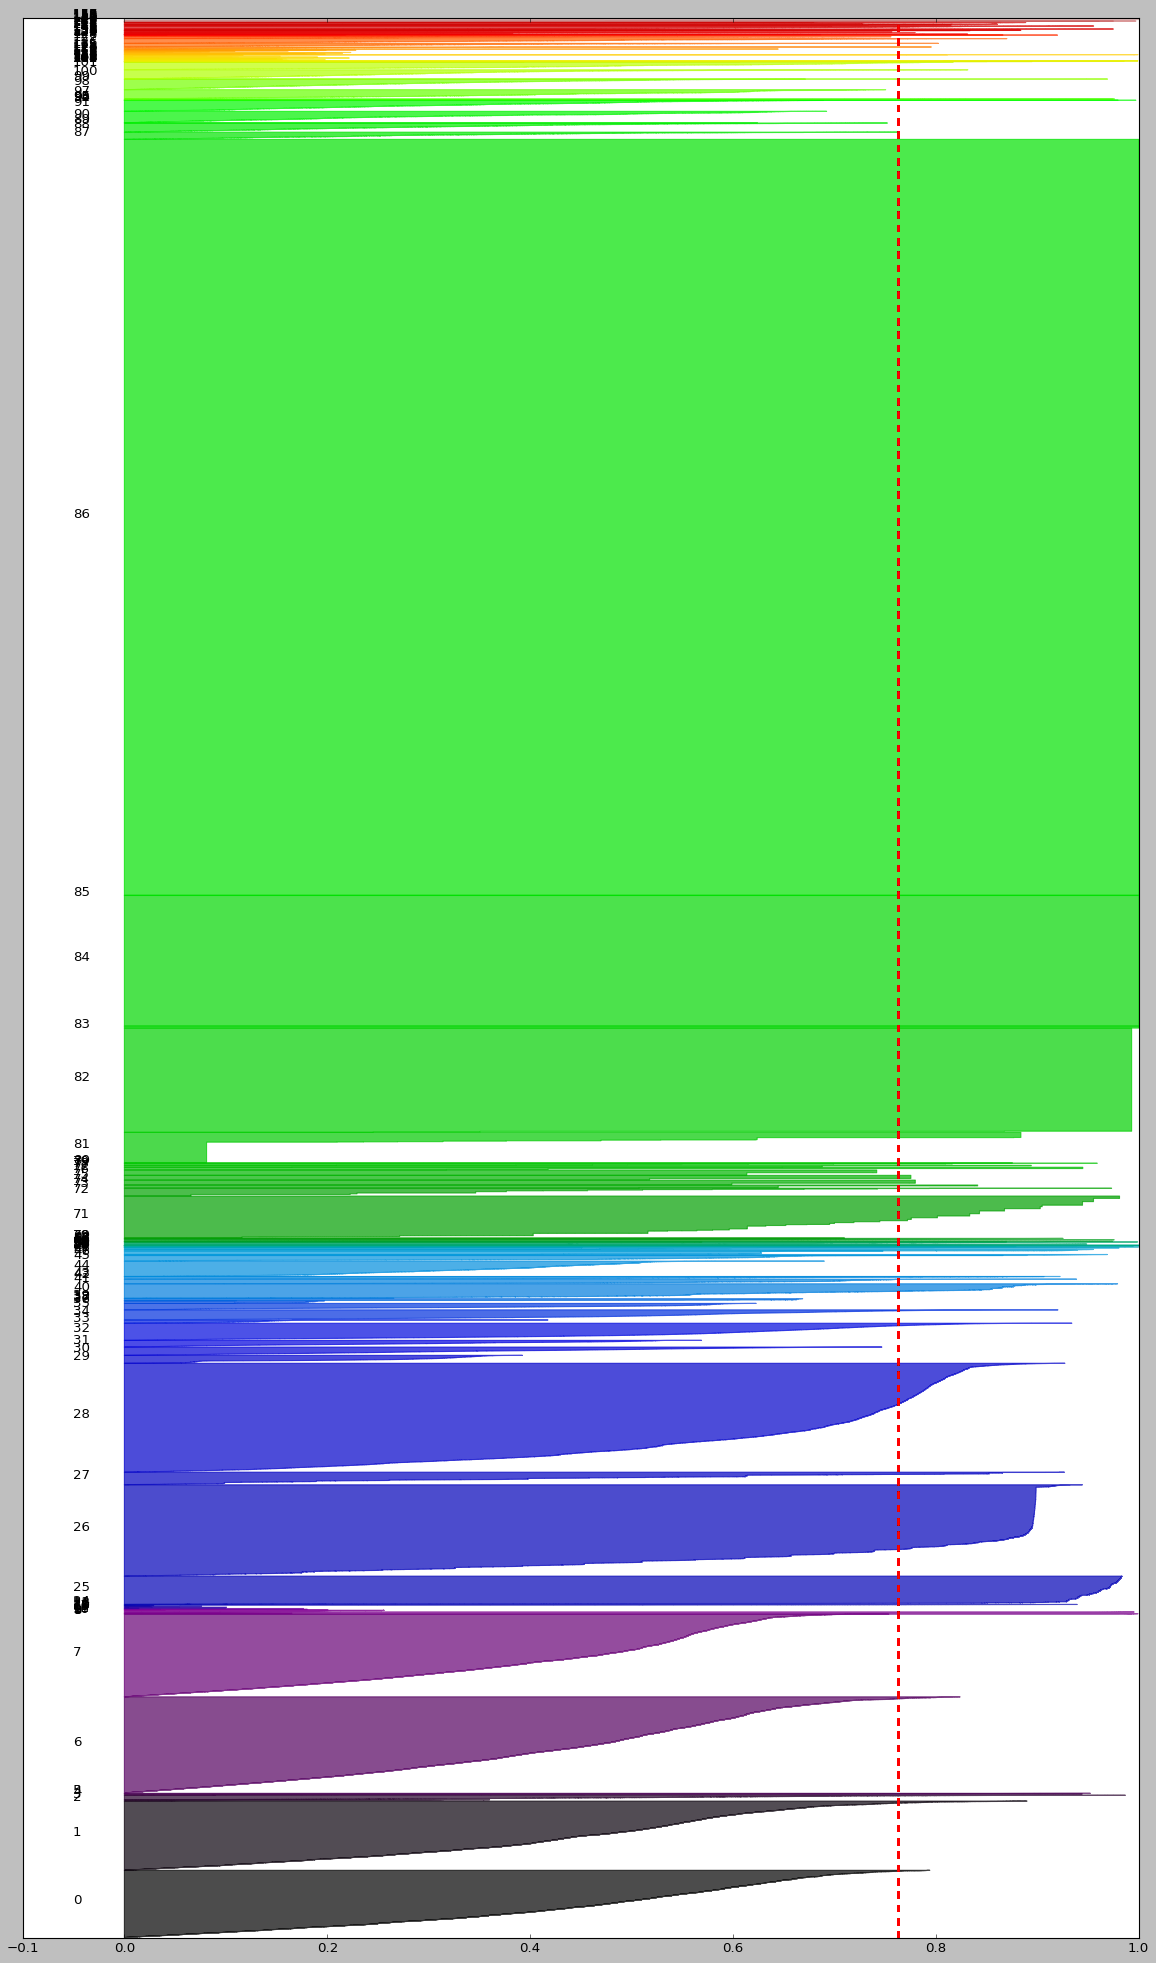

In [49]:
# http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
sns.reset_orig()
fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(18, 30)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
y_lower = 10
for i in sorted(silhouette):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = silhouette[i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = len(silhouette[i])
    y_upper = y_lower + size_cluster_i

    color = cm.spectral(float(i) / len(silhouette))
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

<div class="alert alert-success">
We think that performances are not good, in fact the bisecting kmeans divides big cluster because it tries to minimize the WSSE score. In thiS
way, we finish with big clusters divided, which is not bad per se, but then we eave together data that is very different, as we can see from the big clusters under the avg line.
</div>